<a href="https://colab.research.google.com/github/uswatnkh07/Mini_Project1_DataMining/blob/main/Evaluation_Mini_Project5_DataMining_Uswatun_Khasanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Menganalisis Kepuasan Penumpang Maskapai Penerbangan**

#**Import Library**

In [190]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
sns.set_style("whitegrid")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk meningkatkan tingkat kepuasan pelanggan dengan layanan perusahaan. Hal ini akan dicapai dengan beberapa hal yang nantinya diharapkan dapat mencapai tujuan bisnis tersebut. Beberapa hal tersebut dimulai dari memahami demografi penumpang yang menggunakan maskapai ini, kemudian mengidentifikasi kekuatan dan kelemahan dalam penawaran maskapai penerbangan, dan yang terakhir adalah menyarankan area fokus untuk meningkatkan kepuasan pelanggan.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini tentu terjadi karena adanya resiko kehilangan penumpang, sebab lebih dari separuh penumpang atau pelanggan termasuk pelanggan setia maskapai memberikan laporan bahwa mereka "netral atau tidak puas" dengan layanan maskapai ini.

##**Data Mining Goals**

Tujuan dari data mining pada dataset ini tentu saja untuk menganalisis yang hanya berfokus pada data seputar survei penumpang, Menganalisis demografi dan faktor yang berhubungan dengan perjalanan penumpang, menganalisis penilaian penumpang terhadap berbagai aspek yang berkaitan dengan pelayanan maskapai, mengantisipasi kehilangan penumpang maskapai, dan yang terakhir adalah membuat urutan perbaikan yang diputuskan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dari mengumpulkan data yang relevan seputar survei penumpang pada maskapai ini. Kemudian dataset akan dilakukan pembersihan dan preprocessing data untuk menjaga kekonsistensian dataset yang akan digunakan dalam analisis. Selanjutnya yaitu, mengeksplorasi data untuk memahami hubungan antar variabel dan mengembangkan model prediktif. Dalam tahap ini, analisis data mining akan dilakukan untuk mengidentifikasi faktor-faktor yang berpengaruh terhadap kepuasaan penumpang pada maskapai dan untuk mengetahui faktor service apa saja yang paling berpengaruh terhadap kepuasaan pelanggan. Hasil dari analisis data mining akan digunakan untuk menyusun langkah-langkah yang tepat untuk mengantisipasi kehilangan penumpang. Dengan demikian, rencana proyek ini akan membantu dalam pengembangan program pencegahan yang lebih efektif dan tepat sasaran untuk mengurangi risiko yang akan terjadi dikemudian hari nantinya.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Berdasarkan dengan pengetahuan umum, banyak sekali sumber dan jenis data yang dapat digunakan dalam sebuah analisis. Namun dalam analisis ini, saya menggunakan sumber data dari data publik. Itu artinya, data yang saya gunakan tersedia secara publik dan berikut link akses untuk data yang saya gunakan (https://www.kaggle.com/code/lostinworlds/report-airline-passenger-satisfaction/input?select=train.csv). Selanjutnya ialah memahami, kira-kira jenis data yang saya gunakan tergolong ke dalam jenis data apa? Disini jawabannya unik karena ternyata dataset yang saya gunakan memiliki gabungan jenis data yaitu gabungan antara data kualitatif dengan data ordinal.

In [2]:
#Membaca dataset
train = pd.read_csv('https://raw.githubusercontent.com/uswatnkh07/Mini_Project1_DataMining/main/train.csv')
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##**Describe Data**

####Informasi Dasar

In [3]:
# Mendapatkan jumlah baris dan kolom
jumlah_baris, jumlah_kolom = train.shape

print("\nJumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)


Jumlah Baris: 103904
Jumlah Kolom: 25


In [4]:
# Menampilkan indeks
indeks_df = train.index

print("Indeks DataFrame:")
print(indeks_df)

Indeks DataFrame:
RangeIndex(start=0, stop=103904, step=1)


In [5]:
# Mendapatkan tittle atau nama kolom
nama_kolom = train.columns

print("Title Kolom:")
print(nama_kolom)

Title Kolom:
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [6]:
# show to 5 rows
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Pada informasi dasar ini tidak banyak yang saya tampilkan, hanya jumlah baris dan jumlah kolom beserta indikator atau title kolom saja. Disini terlihat bahwa ada sebanyak 25 kolom termasuk kolom unnamed (kolom indeks tambahan yang disimpan ke dalam DataFrame ketika membaca data dari file CSV), dan juga ada sebanyak 103904 untuk jumlah baris yang ada pada data ini. Itu artinya, analisis ini akan menganalisa sebanyak 24 kolom data yaitu kolom 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction', beserta dengan 10394 baris data/jumlah entri (dihitung dari 0). Untuk informasi lainnya, secara spesifik akan saya bahas di bagian lain.

####Informasi Lanjutan

In [7]:
# Menampilkan informasi lengkap
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039



Output ini memberikan informasi lanjutan dari sebuah data yang disebut dengan sebutan dataset. Pada keterangan 103904 entries, 0 to 103903 menunjukkan bahwa dataset ini memiliki 103904 baris data yang dimulai dari indeks numerik 0 sampai dengan 103903. Selain itu, dataset ini juga memiliki 25 kolom data termasuk indeks 0, lengkap dengan title (#) yang didefiniskan sebagai nomor urut kolom, title (Column) yang didefiisikan sebagai nama kolom, title (Non-Null Count) yang didefiniskan sebagai jumlah baris yang memiliki nilai tidak kosong atau biasa disebut dengan non-null, dan terakhir adalah title (Dtype) yang didefinisikan sebagai tipe data dari masing-masing indikator dataset tersebut, lengkap dengan keterangan tipe datanya yaitu tipe data (int64) sebagai biilangan bulat/integer, (float64) sebagai bilangan desimal/floating-point, dan yang terakhir(object) sebagai string/teks. Dan yang terakhir dan yang paling utama, output ini menampilkan semua konten atau indikator yang terdapat dalam dataset ini. Indikator tersebut yaitu Id, Gender, Customer Type, Age, Type of Travel, Class, Flight distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Check-in service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, Satisfaction.

Berikut penjelasan spesifik dari setiap kolom , mulai dari nama kolom, jumlah baris datanya, dan terakhir adalah tipe data dari masing-masing kolom:
1.   ID: nomor unik pelanggan, memiliki 103904 nilai non-null bertipe data integer.

1.   Gender: Jenis Kelamin Penumpang (Female, Male), memiliki 103904 nilai non-null bertipe data object.

2.   Customer Type: Jenis pelanggan (Loyal customer, disloyal customer), memiliki 103904 nilai non-null bertipe data object.

1.   Age: Usia penumpang sebenarnya, memiliki 103904 nilai non-null bertipe data integer.

2.   Type of Travel: Tujuan penerbangan penumpang (Personal Travel, Business Travel), memiliki 103904 nilai non-null bertipe data object.

1.   Class: Kelas penumpang di pesawat (Business, Eco, Eco Plus), memiliki 103904 nilai non-null bertipe data object.

2.   Flight distance: Jarak penerbangan dari perjalanan ini, memiliki 103904 nilai non-null bertipe data integer.

1.   Inflight wifi service: ingkat kepuasan terhadap layanan wifi dalam pesawat (0: Tidak Berlaku; 1-5), memiliki 103904 nilai non-null bertipe data integer.

2.   Departure/Arrival time convenient: Tingkat kepuasan waktu Keberangkatan/Kedatangan yang nyaman, memiliki 103904 nilai non-null bertipe data integer.

1.   Ease of Online booking: Tingkat kepuasan pemesanan online, memiliki 103904 nilai non-null bertipe data integer.

2.   Gate location: Tingkat kepuasan lokasi Gerbang, memiliki 103904 nilai non-null bertipe data integer.

1.   Food and drink: Tingkat kepuasan terhadap Makanan dan minuman, memiliki 103904 nilai non-null bertipe data integer.

2.   Online boarding: Tingkat kepuasan terhadap online boarding, memiliki 103904 nilai non-null bertipe data integer.

1.   Seat comfort: Tingkat kepuasan kenyamanan kursi, memiliki 103904 nilai non-null bertipe data integer.

2.   Inflight entertainment: Tingkat kepuasan terhadap hiburan dalam pesawat, memiliki 103904 nilai non-null bertipe data integer.

1.   On-board service: Tingkat kepuasan terhadap layanan On-board service, memiliki 103904 nilai non-null bertipe data integer.

2.   Leg room service: Tingkat kepuasan terhadap layanan leg room seat, memiliki 103904 nilai non-null bertipe data integer.

1.   Baggage handling: Tingkat kepuasan penanganan bagasi, memiliki 103904 nilai non-null bertipe data integer.

2.   Check-in service: Tingkat kepuasan layanan Check-in, memiliki 103904 nilai non-null bertipe data integer.

1.   Inflight service: Tingkat kepuasan layanan dalam pesawat, memiliki 103904 nilai non-null bertipe data integer.

2.   Cleanliness: Tingkat kepuasan terhadap Kebersihan, memiliki 103904 nilai non-null bertipe data integer.

1.   Departure Delay in Minutes: Keterlambatan menit saat keberangkatan, memiliki 103904 nilai non-null bertipe data integer.

2.   Arrival Delay in Minutes: Menit tertunda saat Kedatangan, memiliki 103594 nilai non-null bertipe data float.

1.   Satisfaction: Tingkat kepuasan maskapai penerbangan(Satisfaction, neutral or dissatisfaction), memiliki 103904 nilai non-null bertipe data object.


Berdasarkan informasi tersebut terlihat bahwa tidak ada kolom yang bernilai kosong, hanya saja ada satu kolom yaitu kolom  "Arrival Delay in Minutes" yang hanya memiliki 103594 nilai data. Dari 103904 nilai yang harus terisi, itu berarti sebanyak 310 nilai data tidak tersedia atau dinyatakan kosong pada kolom "Arrival Delay in Minutes". Namun hal ini akan saya atasi agar data yang saya gunakan dalam analisis ini akurat, lengkap, dan dapat diandalkan, sehingga hasil analisis yang dihasilkan dapat dipercaya. Dari penjelasannya ini dapat disimpulkan bahwa output ini memberikan gambaran mengenai struktur, isi, status kekosongan, dan status terduplikasinya suatu kumpulan data yang tersimpan dalam format data frame.

####Informasi Statistik Deskriptif

In [8]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Penjelasan mengenai informasi statistik deskriptif

1.   Age: Rata-rata usia penumpang pada adalah 39 tahun dengan standar deviasi 15.11. Usia tersbut dimulai dari usia 7 tahun sampai 85 tahun. Mayoritas usia penumpang yaitu usia 27 hingga 51 tahun.

2.   Flight distance: Rata-rata flight distance maskapai ini adalah 1189.45 dengan standar deviasi 997.14. Ini dimulai dari jarak 31km sampai 4983km. Mayoritasnya adalah 414km hingga 1743km.

1.   Inflight wifi service: Rata-rata ini adalah 2.73 dengan standar deviasi 1.33. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

2.   Departure/Arrival time convenient: Rata-rata ini adalah 3.06 dengan standar deviasi 1.52. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

1.   Ease of Online booking: Rata-rata ini adalah 2.76 dengan standar deviasi 1.40. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

2.   Gate location: Rata-rata ini adalah 2.98 dengan standar deviasi 1.28. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

1.   Food and drink: Rata-rata ini adalah 3.20 dengan standar deviasi 1.33. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

2.   Online boarding: Rata-rata ini adalah 3.25 dengan standar deviasi 1.35. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

1.   Seat comfort: Rata-rata ini adalah 3.44 dengan standar deviasi 1.32. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 5.

2.   Inflight entertainment: Rata-rata ini adalah 3.39 dengan standar deviasi 1.33. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

1.   On-board service: Rata-rata ini adalah 3.38 dengan standar deviasi 1.29. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

2.   Leg room service: Rata-rata ini adalah 3.35 dengan standar deviasi 1.31. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

1.   Baggage handling: Rata-rata ini adalah 3.63 dengan standar deviasi 1.18. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 3 hingga 5.

2.   Check-in service: Rata-rata ini adalah 3.30 dengan standar deviasi 1.26. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 3 hingga 4.

1.   Inflight service: Rata-rata ini adalah 3.64dengan standar deviasi 1.17. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 3 hingga 5.

2.   Cleanliness: Rata-rata ini adalah 3.29 dengan standar deviasi 1.31. Dimulai dari rate 0 sampai 5. Mayoritas penumpang memilih rate 2 hingga 4.

1.   Departure Delay in Minutes: Rata-rata ini adalah 14.81 dengan standar deviasi 38.23. Dimulai dari rate 0 sampai 1592 menit. Mayoritas penumpang memilih rate 0 hingga 12 menit.

2.   Arrival Delay in Minutes: Rata-rata ini adalah 15.18 dengan standar deviasi 38.70. Dimulai dari rate 0 sampai 1584 menit. Mayoritas penumpang memilih rate 0 hingga 12 menit.


##**Exploratory Data Analysis**

In [9]:
# data numerik
numeric_data = train.select_dtypes(include=['int64'])
numeric_data

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [10]:
# data kategori
categorical_data = train.select_dtypes(include=['object'])
categorical_data

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


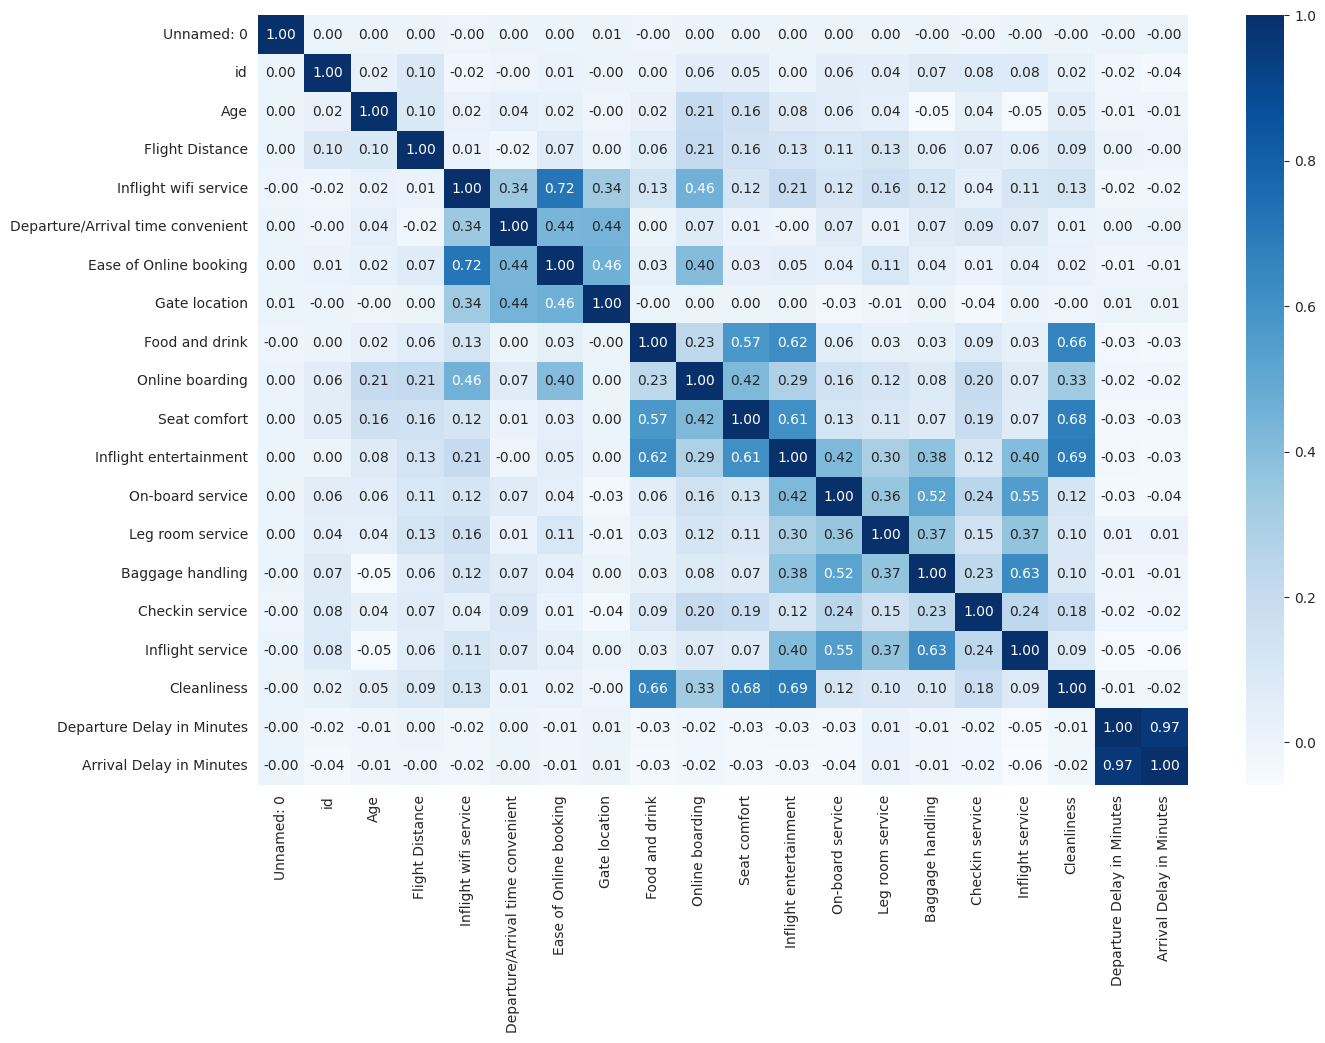

In [11]:
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cbar=True, cmap="Blues")
plt.gcf().set_size_inches(15, 10)
plt.show()

Visualisasi ini menunjukkan adanya korelasi antar setiap variabelnya. Berikut saya akan bahas dari masing-masing kolom yang saya maksud:

##Satisfaction

Secara keseluruhan, kepuasan dapat diklasifikasikan secara biner, di mana setiap penumpang memberi peringkat pengalaman mereka secara keseluruhan sebagai "puas" atau "netral atau tidak puas". Data dibagi cukup merata antara kedua tipe penumpang ini, dengan sedikit kecenderungan mendukung mereka yang memberi peringkat pengalaman mereka sebagai "netral atau tidak puas", sebanyak 56,7%. Oleh karena itu, tanpa informasi lebih lanjut, model dasar hanya dapat memprediksi dengan akurat bahwa setiap penumpang akan bersikap netral atau tidak puas sekitar 50%. Harus diakui bahwa pengelompokan data dengan cara biner ini agak membatasi. Sementara kelompok yang puas sangat sedikit sekali, kelompok netral atau tidak puas dalam satu kelompok dapat membatasi pendekatan maskapai dalam meningkatkan kepuasan pelanggan. Misalnya, jika sebagian besar dalam kelompok ini tidak puas dengan layanan, perbaikan yang drastis dan segera mungkin diperlukan dengan layanan tersebut. Berikut visualisasinya:

In [12]:
# create formula to calcuate the dissatisfied rate based on a variable
# method modified from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s.
#credit to Data Science With Chris.
def pivot_satisfaction (train, target):

    df_pivot = pd.pivot_table(
        train[["id", target, "satisfaction"]],
        index = [target],
        columns = ["satisfaction"],
        aggfunc = "count",
        fill_value =0).reset_index()

    df_pivot.columns = [target, "neutral or dissatisfied", "satisfied"]

    df_pivot["total"] = df_pivot["satisfied"]+df_pivot["neutral or dissatisfied"]
    df_pivot["dissatisfied_rate"] = df_pivot["neutral or dissatisfied"]/df_pivot["total"]*100

    return df_pivot

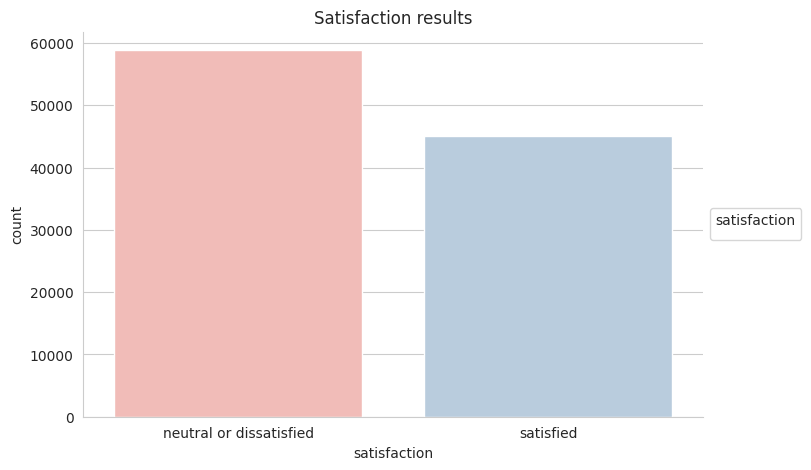

In [13]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="satisfaction", data = train, hue ="satisfaction", palette ="Pastel1" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [14]:
print(round((train[train["satisfaction"]=="neutral or dissatisfied"].shape[0]/train.shape[0])*100, 2),"% penumpang bersikap netral atau tidak puas dengan pelayanan yang diberikan oleh maskapai")

56.67 % penumpang bersikap netral atau tidak puas dengan pelayanan yang diberikan oleh maskapai


##Gender

Variabel berikutnya adalah "gender" atau jenis kelamin. Pembagian jenis kelamin dalam dataset ini cukup merata, dengan 49,25% dari penumpang adalah laki-laki. Namun harus diakui bahwa ini merupakan klasifikasi biner yang memberikan sedikit ruang bagi mereka yang tidak ingin mengungkapkan jenis kelamin mereka atau tidak sesuai dengan dua jenis kelamin tradisional. Oleh karena itu, dalam pengulangan survei semacam itu, kriteria jenis kelamin dapat diperbarui. Meskipun demikian, terlihat bahwa tingkat kepuasan untuk kedua jenis kelamin relatif serupa, dengan lebih dari 55% individu dari kedua jenis kelamin melaporkan bahwa mereka tidak puas dengan layanan tersebut. Berikut visualisasinya:

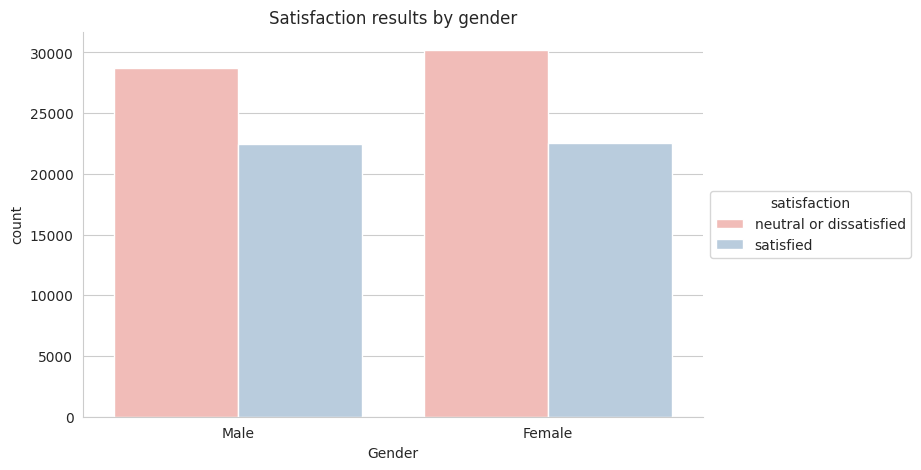

In [15]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = train, hue ="satisfaction", palette ="Pastel1" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [16]:
# calcuate dissatisfied_rate for gender
pivot_satisfaction(train,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Female,30193,22534,52727,57.262882
1,Male,28686,22491,51177,56.052524


##Customer Type

Tipe pelanggan menunjukkan apakah seorang penumpang setia atau tidak setia, dengan kecenderungan yang besar mendukung pelanggan setia. Jika dianalisis variabel ini, bersamaan dengan kepuasan keseluruhan menyoroti kekhawatiran utama. Yaitu ada jumlah pelanggan setia yang tinggi dan tidak puas dengan layanan. Mengingat bahwa individu biasanya menjadi pelanggan setia karena mereka menghargai layanan yang ditawarkan oleh bisnis tersebut, justru ini ketidakpuasan mereka menunjukkan bahwa layanan mungkin telah berubah baru-baru ini dalam artian bahwa layanan tersebut gagal memenuhi perubahan pasar. Seperti yang disebutkan sebelumnya, pelanggan setia dapat menjadi tulang punggung bisnis, dan jika layanan tidak meningkat bisnis dapat menghadapi kesulitan. Selain itu, pelanggan tidak setia tidak hanya mendukung tren ini, tetapi lebih memperkuatnya. Krena lebih dari 76% pelanggan tidak setia menyatakan bahwa mereka tidak puas dengan layanan. Oleh karena itu, bisnis dalam bentuknya saat ini mungkin tidak dapat mengandalkan aliran konstan untuk pelanggan baru. sehingga potensi kehilangan pelanggan pun bisa saja terjadi. Berikut visualisasinya:

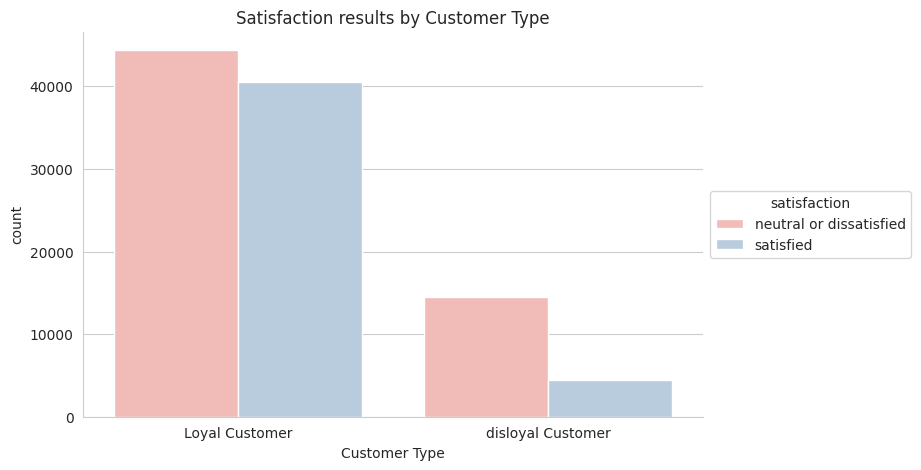

In [17]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = train, hue ="satisfaction" ,palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [18]:
# calcuate dissatisfied_rate for gender
pivot_satisfaction(train,"Customer Type")

,Customer Type,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Loyal Customer,44390,40533,84923,52.270881
1,disloyal Customer,14489,4492,18981,76.334229


##Age

Pada variabel usia, beberapa aspek tampak menonjol. Pertama, terlihat bahwa sebagian besar dari mereka yang puas dengan kualitas layanan berada di atas usia rata-rata, antara 40 dan 60 tahun. Namun, setelah sekitar 60 tahun, kepuasan tiba-tiba menurun. Begitu pula dengan kasus banyak penumpang yang lebih muda menemui masalah dengan layanan. Dengan demikian, dapat disimpulkan bahwa kepuasan pelanggan cenderung berkaitan dengan kelompok usia tertentu. Kelompok usia antara 40 dan 60 tahun lebih mungkin merasa puas, sementara pelanggan di atas 60 tahun atau yang lebih muda mungkin mengalami tingkat kepuasan yang lebih rendah. Analisis ini dapat memberikan wawasan berharga untuk meningkatkan pengalaman pelanggan dengan menyesuaikan layanan sesuai dengan preferensi dan harapan yang mungkin berbeda di antara kelompok usia tersebut. Berikut visualisasinya:

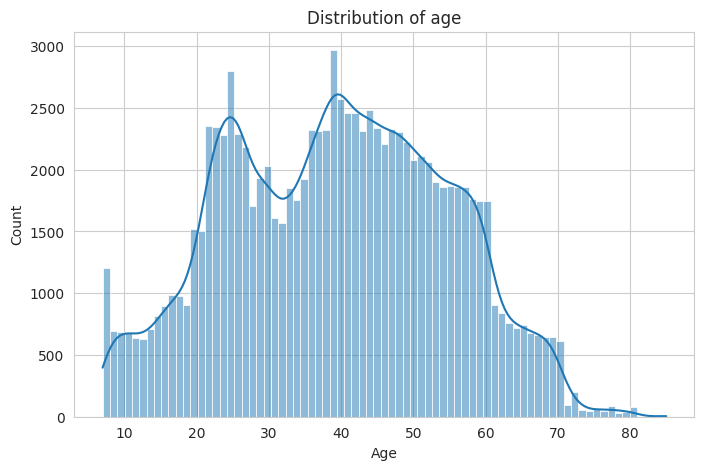

In [19]:
# create graph
plt.figure(figsize = (8,5))
sns.histplot( x= "Age", data = train, kde= True)

# format graph
plt.title("Distribution of age")
plt.show()

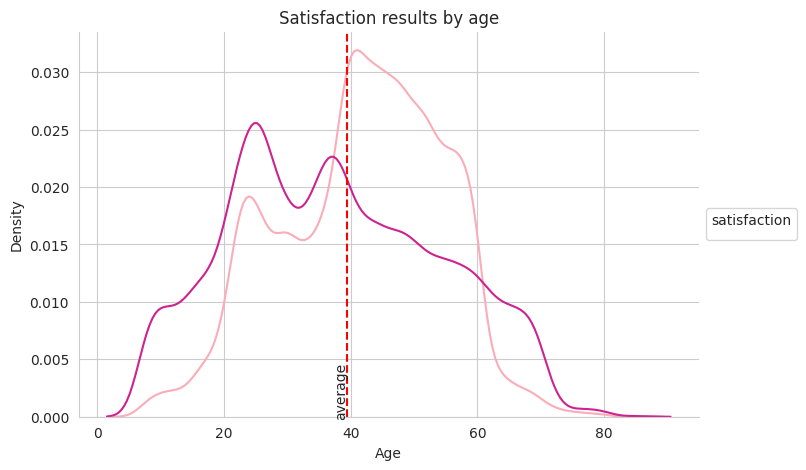

In [20]:
# create graph
plt.figure(figsize = (8,5))
sns.kdeplot(data = train, x= "Age", hue = "satisfaction", common_norm = False, palette ="RdPu_r")

# format graph
plt.title("Satisfaction results by age")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.axvline(train["Age"].mean(),ls = "--", color = "red")
plt.text(train["Age"].mean()-2,0,'average',rotation=90)
plt.show()

In [21]:
train["Age"].mean()

39.379706267323684

Usia dapat dikelompokkan menjadi kategori, yaitu di bawah 40 tahun, 40 hingga 60 tahun, dan di atas 60 tahun. Melakukan hal ini mengungkapkan bahwa untuk mereka yang berusia di bawah 40 tahun, tingkat ketidakpuasan mencapai lebih dari 65%. Untuk mereka yang berusia antara 40 dan 60 tahun, tingkat ketidakpuasan turun menjadi 42%. Namun, bagi mereka yang berusia di atas 60 tahun, tingkat ketidakpuasan mencapai lebih dari 70%. Perhatian khusus juga bahwa mungkin ada masalah dalam pencatatan data ini. Terdapat puncak nilai yang signifikan untuk mereka yang berusia 10 tahun yang melaporkan bahwa layanan tersebut tidak memuaskan. Meskipun anak berusia 10 tahun mungkin telah mengisi formulir ini, karena sifat pertanyaannya ada kemungkinan bahwa pihak ketiga telah membantu dalam pengisian ini. Usia ini dapat mempertanyakan apakah ada pihak yang bertindak dengan niat buruk dalam merespons pertanyaan-pertanyaan tersebut.

In [22]:
def age_group (row):
    if row < 40:
        return "Young"
    if (row >= 40) & (row < 60):
        return "middle age"
    if row >= 60:
        return "senior"
    else:
        return "no age"

train["Age_group"] = train["Age"].apply(lambda row: age_group(row))

In [23]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Age_group")

,Age_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Young,33692,17694,51386,65.566497
1,middle age,18104,24695,42799,42.300054
2,senior,7083,2636,9719,72.877868


Dalam kasus seperti ini, tergantung pada situasinya. Data yang terkait dengan anak-anak yang sangat muda dapat dihapus. Namun, karena dataset uji juga mencakup kelompok usia seperti itu, untuk tujuan latihan pula data tersebut harus tetap ada. Hal ini dilakukan untuk memberikan model pemahaman terhadap seluruh spektrum data, meskipun kita menyadari bahwa nilai-nilai yang ekstrem atau tidak biasa mungkin muncul dalam dataset tersebut.

<ipython-input-24-1705477fffa2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Age", data = train,palette ="Pastel1" )


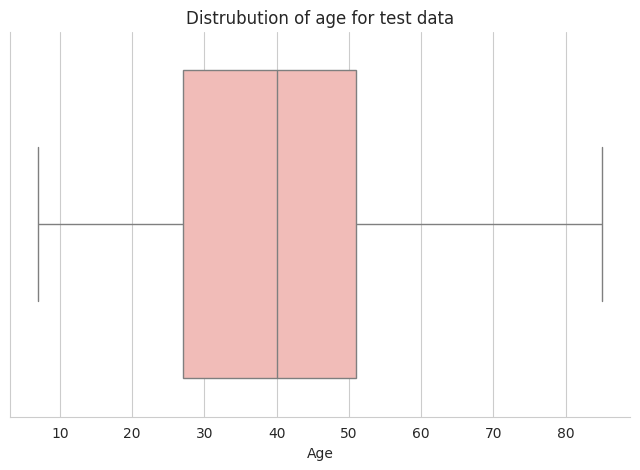

In [24]:
# create graph
plt.figure(figsize = (8,5))
sns.boxplot(x = "Age", data = train,palette ="Pastel1" )

# format graph
plt.title("Distrubution of age for test data")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

##Type of travel

Tipe bisnis memberikan wawasan yang mengungkapkan tentang operasi maskapai penerbangan. Tampaknya maskapai ini mungkin mengkhususkan diri dalam melayani pelanggan bisnis, karena sebagian besar penumpang menggunakan maskapai ini untuk bepergian dalam rangka bisnis. Selain itu, pelanggan bisnis tersebut lebih cenderung merasa puas dengan layanan yang diberikan. Namun, mereka yang bepergian untuk alasan pribadi menemukan pengalaman yang sangat buruk, sekitar 90%. Ini merupakan hal yang mengkhawatirkan, dan maskapai harus meneliti masalah yang berkaitan dengan layanan mereka dan memperbaiki setiap isu dengan segera dan sungguh-sungguh, jika mereka ingin mempertahankan pelanggan.

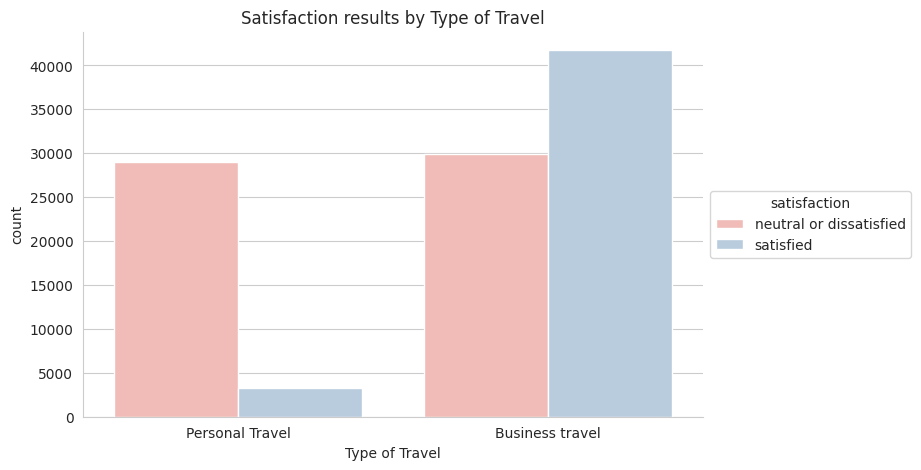

In [25]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Type of Travel", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Type of Travel")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [26]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business travel,29909,41746,71655,41.740283
1,Personal Travel,28970,3279,32249,89.832243


##Classes

Kelas juga menyoroti dominasi perjalanan bisnis karena sebagian besar yang bepergian dengan kelas bisnis merasa puas dengan layanan yang mereka terima. Sebaliknya, mereka yang berada di kelas ekonomi sangat tidak puas dengan layanan, dengan 81% mengungkapkan ketidakpuasan. Mengingat bahwa 45% dari penumpang bepergian dengan kelas ekonomi, maskapai seharusnya fokus untuk meningkatkan layanan mereka di area ini. Ini terutama berlaku karena bahkan pelanggan bisnis yang menggunakan kelas ekonomi merasa kecewa dengan layanan. Kualitas yang buruk dari kelas ekonomi juga tampaknya menjadi faktor utama dalam penilaian rendah di kalangan mereka yang bepergian untuk alasan pribadi, dan mereka lebih cenderung menggunakan kelas ekonomi.







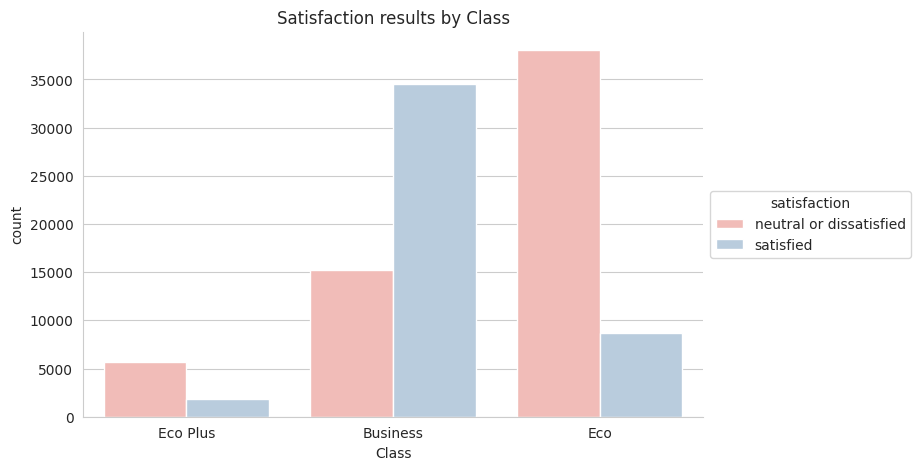

In [27]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Class", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [28]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Class")

,Class,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business,15185,34480,49665,30.574852
1,Eco,38044,8701,46745,81.386245
2,Eco Plus,5650,1844,7494,75.393648


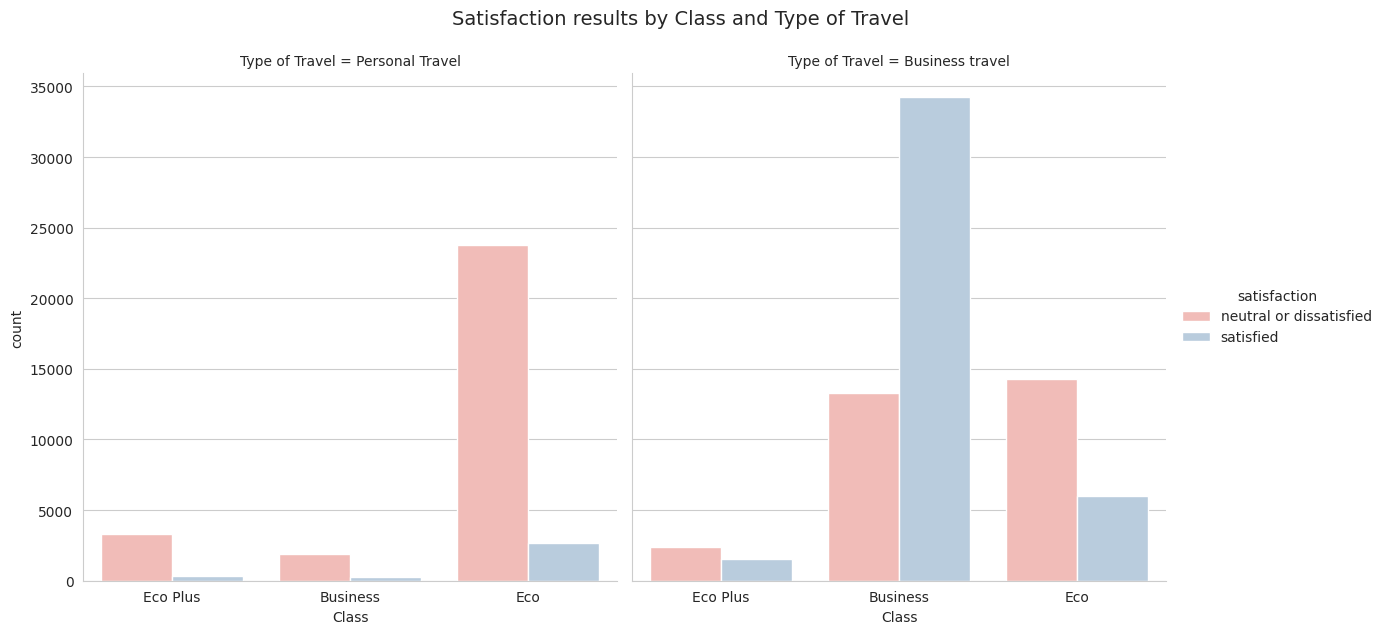

In [29]:
# create graph
sns.catplot( x ="Class", hue ="satisfaction", kind = "count", col = "Type of Travel",
            data = train ,palette ="Pastel1", height = 6)

# format graph
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

##Flying distance

Pada pandangan pertama, terlihat bahwa maskapai penerbangan memiliki keunggulan khusus dalam perjalanan jarak jauh. Investigasi lebih lanjut mengungkap bahwa tingkat ketidakpuasan berbeda jika seseorang telah melakukan perjalanan lebih atau kurang dari 1500 km. (Catatan: unit diasumsikan sebagai metadata yang tidak tersedia). Bagi mereka yang melakukan perjalanan kurang dari 1500 km, tingkat ketidakpuasan mencapai 66%. Namun, jika penumpang melakukan perjalanan lebih dari 1500 km, mereka hanya memiliki kemungkinan 34% untuk merasa tidak puas dengan layanan. Karena beberapa maskapai menawarkan layanan yang berbeda tergantung pada perjalanan jarak jauh atau dekat, seperti ukuran bagasi, penawaran perjalanan jarak pendek dari maskapai ini mungkin kurang memuaskan. Diskusi lebih lanjut dengan maskapai diperlukan untuk mengonfirmasi apakah hal ini memang benar.






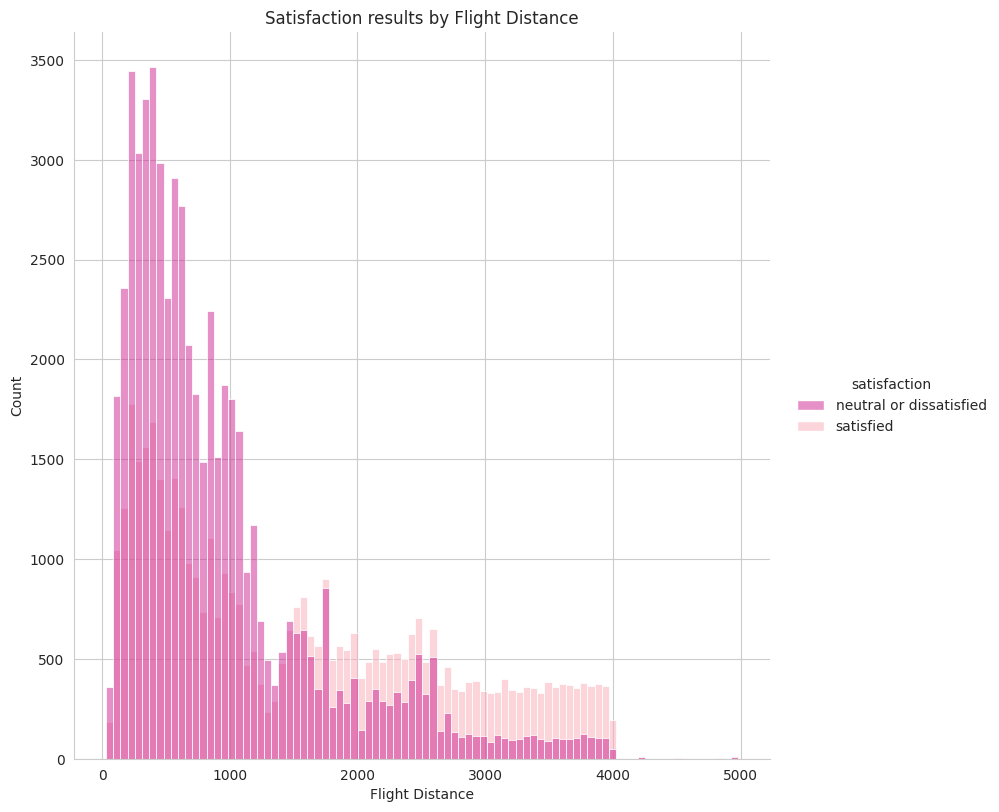

In [30]:
# create graph
sns.displot(x = "Flight Distance", data = train, hue ="satisfaction", height = 8,palette ="RdPu_r"  )
plt.title("Satisfaction results by Flight Distance")


plt.show()

In [31]:
def distance_group (row):
    if row < 1500:
        return "less than 1500"
    else:
        return "more than 1500"

train["distance_group"] = train["Flight Distance"].apply(lambda row: distance_group(row))

In [32]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,48138,24256,72394,66.494461
1,more than 1500,10741,20769,31510,34.087591



Di sisi lain, membandingkan tingkat kepuasan tergantung pada jarak yang dibagi berdasarkan jenis perjalanan, menyoroti bahwa jenis perjalanan memiliki dampak yang lebih besar pada kepuasan. Sebagai contoh, tanpa memandang jarak, mereka yang melakukan perjalanan untuk alasan pribadi hampir 90% merasa tidak puas dengan layanan. Bagi pelanggan bisnis, jika mereka melakukan perjalanan kurang dari 1500 km, mereka memiliki kemungkinan 51% untuk merasa tidak puas dengan layanan. Namun, jika mereka melakukan perjalanan lebih dari 1500 km, mereka hanya memiliki kemungkinan 26% untuk merasa tidak puas dengan layanan.

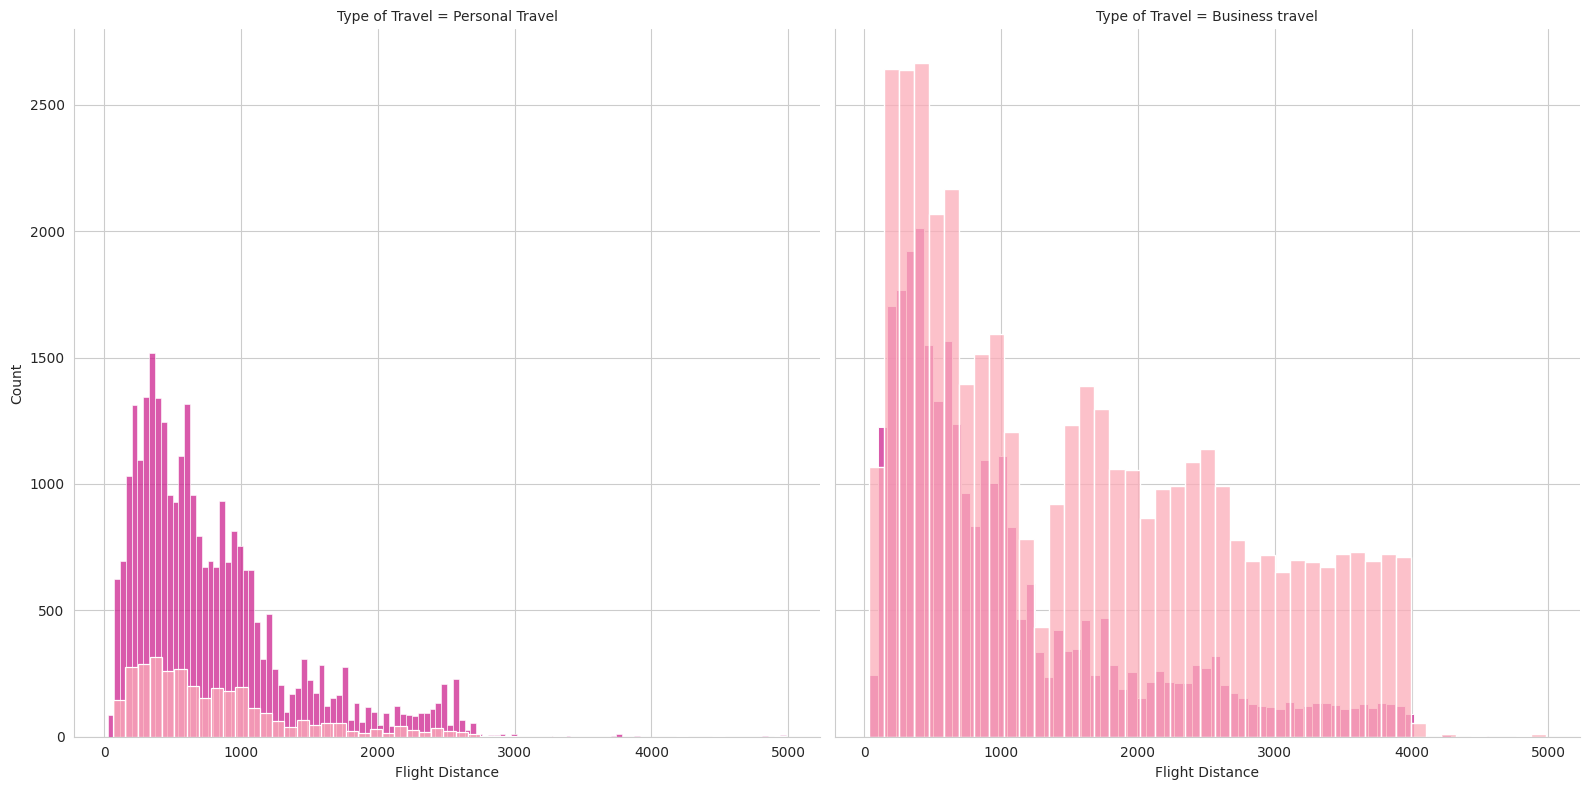

In [33]:
# create graph
g = sns.FacetGrid(train, col = "Type of Travel", hue ="satisfaction", height = 8, palette ="RdPu_r" )
g.map(sns.histplot, "Flight Distance",  )
plt.show()

In [34]:
# create subset of dataset for personal travel and business
personal = train[train["Type of Travel"]=="Personal Travel"]
business =train[train["Type of Travel"]=="Business travel"]

In [35]:
# calcuate dissatisfied_rate for distance_group - business
pivot_satisfaction(business,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,22679,21405,44084,51.444969
1,more than 1500,7230,20341,27571,26.223206


In [36]:
# calcuate dissatisfied_rate for distance_group - personal
pivot_satisfaction(personal,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,25459,2851,28310,89.929354
1,more than 1500,3511,428,3939,89.134298


##Inflight WIFI service

Pada variabel ini, dataset beralih perhatiannya ke variabel subjektif yang berkaitan dengan persepsi pelanggan terhadap berbagai aspek layanan yang mereka terima, dimulai dengan layanan WIFI di dalam pesawat.

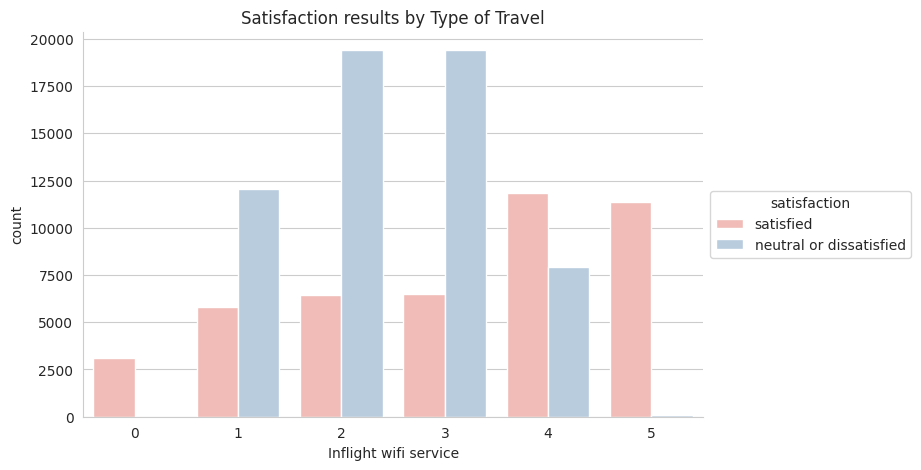

In [37]:
# Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight wifi service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Type of Travel")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Untuk variabel ini, nampaknya secara umum jika penumpang memberi peringkat layanan antara 1 dan 3, mereka lebih cenderung menganggap bahwa layanan secara keseluruhan buruk. Sebaliknya, karena jenis perjalanan memiliki dampak besar pada kepuasan, data dapat dilihat dengan menghormati faktor ini. Dalam melakukannya, menyoroti bahwa untuk penumpang bisnis, mereka mengikuti tren keseluruhan yang telah diidentifikasi sebelumnya. Antara peringkat 1 dan 3 untuk WIFI, tingkat ketidakpuasan keseluruhan meningkat. Namun, pada peringkat 4, tingkat kepuasan turun secara signifikan. Pelanggan perjalanan pribadi juga mencatat pola serupa. Di sisi lain, karena mereka secara keseluruhan lebih cenderung merasa tidak puas, untuk skor antara 1 hingga 3 untuk WIFI di dalam pesawat, semua penumpang cenderung memberikan penilaian bahwa layanan secara keseluruhan tidak memuaskan. Meskipun demikian, tingkat kepuasan tertinggi diidentifikasi di antara pelanggan perjalanan pribadi yang memberikan peringkat 5 bintang untuk WIFI.

In [38]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,8,3095,3103,0.257815
1,1,12034,5806,17840,67.455157
2,2,19407,6423,25830,75.133566
3,3,19386,6482,25868,74.942013
4,4,7938,11856,19794,40.103062
5,5,106,11363,11469,0.924231


In [39]:
# calcuate dissatisfied_rate for Inflight wifi service - business
pivot_satisfaction(business,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,8,2444,2452,0.326264
1,1,6227,5806,12033,51.749356
2,2,9832,6423,16255,60.486004
3,3,9586,6482,16068,59.658949
4,4,4150,10529,14679,28.271681
5,5,106,10062,10168,1.042486


In [40]:
# calcuate dissatisfied_rate for Inflight wifi service - personal

pivot_satisfaction(personal,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,651,651,0.000000
1,1,5807,0,5807,100.000000
2,2,9575,0,9575,100.000000
3,3,9800,0,9800,100.000000
4,4,3788,1327,5115,74.056696
5,5,0,1301,1301,0.000000


##Departure/Arrival time convenient

Untuk kenyamanan Waktu Keberangkatan/Kedatangan, nampaknya tingkat kenyamanan memiliki dampak yang sedikit pada kepuasan keseluruhan. Meski begitu, bagi mereka yang memberikan peringkat waktu sebagai sangat nyaman (5 bintang), ketidakpuasan mereka terhadap layanan hanya sebesar 30%.

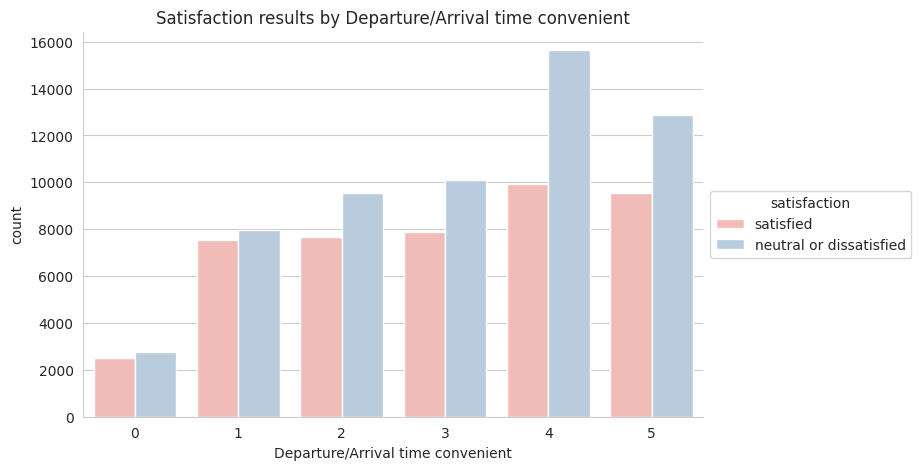

In [41]:
# Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

# create graph
plt.figure(figsize = (8,5))
sns.countplot(x = "Departure/Arrival time convenient", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Departure/Arrival time convenient")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [42]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,2780,2520,5300,52.452830
1,1,7957,7541,15498,51.342109
2,2,9534,7657,17191,55.459252
3,3,10093,7873,17966,56.178337
4,4,15640,9906,25546,61.222892
5,5,12875,9528,22403,57.469982


In [43]:
# calcuate dissatisfied_rate for Departure/Arrival time convenient - business
pivot_satisfaction(business,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1992,2439,4431,44.955992
1,1,5513,7257,12770,43.171496
2,2,6782,7348,14130,47.997169
3,3,6635,7531,14166,46.837498
4,4,5372,8704,14076,38.164251
5,5,3615,8467,12082,29.920543


In [44]:
# calcuate dissatisfied_rate for Departure/Arrival time convenient - personal
pivot_satisfaction(personal,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,788,81,869,90.678941
1,1,2444,284,2728,89.589443
2,2,2752,309,3061,89.905260
3,3,3458,342,3800,91.000000
4,4,10268,1202,11470,89.520488
5,5,9260,1061,10321,89.719988


##Ease of Online booking


Sama seperti WIFI, mereka yang puas dengan layanan pemesanan lebih cenderung memberikan penilaian bahwa layanan secara keseluruhan memuaskan.






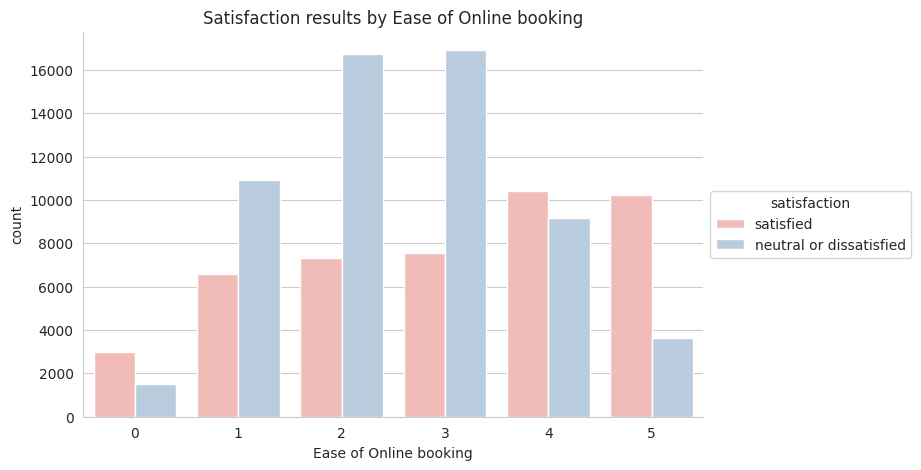

In [45]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x = "Ease of Online booking", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Ease of Online booking")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [46]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1507,2980,4487,33.585915
1,1,10935,6590,17525,62.396576
2,2,16720,7301,24021,69.605762
3,3,16912,7537,24449,69.172563
4,4,9180,10391,19571,46.906137
5,5,3625,10226,13851,26.171396


Di sisi lain, untuk pelanggan perjalanan pribadi, jika layanan pemesanan buruk, mereka sangat mungkin menilai bahwa layanan secara keseluruhan buruk.

In [47]:
# calcuate dissatisfied_rate for Ease of Online booking - business
pivot_satisfaction(business,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,389,2292,2681,14.509511
1,1,5580,6532,12112,46.070013
2,2,7730,7268,14998,51.540205
3,3,7755,7444,15199,51.023094
4,4,5288,9218,14506,36.453881
5,5,3167,8992,12159,26.046550


In [48]:
# calcuate dissatisfied_rate for Ease of Online booking - personal
pivot_satisfaction(personal,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1118,688,1806,61.904762
1,1,5355,58,5413,98.928505
2,2,8990,33,9023,99.634268
3,3,9157,93,9250,98.994595
4,4,3892,1173,5065,76.841066
5,5,458,1234,1692,27.068558


##Gate location

Tampaknya gerbang lokasi mungkin memiliki dampak yang relatif terbatas pada kepuasan keseluruhan. Tingkat korelasi umumnya rendah, dan tidak ada fluktuasi besar dalam kepuasan keseluruhan tergantung pada kenyamanan lokasi gerbang, tidak peduli jenis perjalanan.

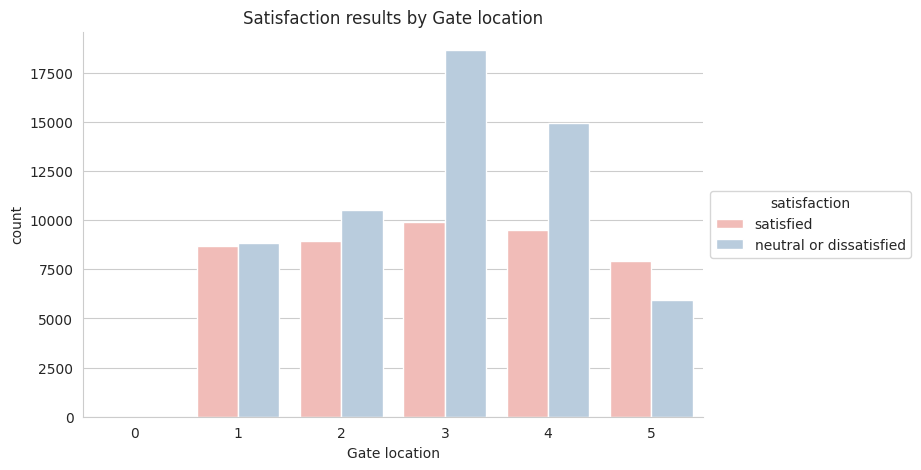

In [49]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gate location", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Gate location")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [50]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1,1,0.000000
1,1,8859,8703,17562,50.444141
2,2,10494,8965,19459,53.928773
3,3,18655,9922,28577,65.279770
4,4,14936,9490,24426,61.147957
5,5,5935,7944,13879,42.762447


In [51]:
# calcuate dissatisfied_rate for Gate location - business
pivot_satisfaction(business,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1,1,0.000000
1,1,4601,8206,12807,35.925666
2,2,5267,8360,13627,38.651207
3,3,8561,8781,17342,49.365702
4,4,7623,8660,16283,46.815697
5,5,3857,7738,11595,33.264338


In [52]:
# calcuate dissatisfied_rate for Gate location - personal
pivot_satisfaction(personal,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4258,497,4755,89.547844
1,2,5227,605,5832,89.626200
2,3,10094,1141,11235,89.844237
3,4,7313,830,8143,89.807196
4,5,2078,206,2284,90.980736


##Food and drink

Dampak pada kepuasan keseluruhan berdasarkan makanan dan minuman tampaknya agak lemah. Namun, bagi pelanggan bisnis, jika mereka menilai makanan sangat buruk, mereka lebih cenderung memberikan penilaian bahwa kepuasan keseluruhan buruk. Oleh karena itu, mungkin ada manfaat dalam memastikan bahwa makanan tidak dinilai.

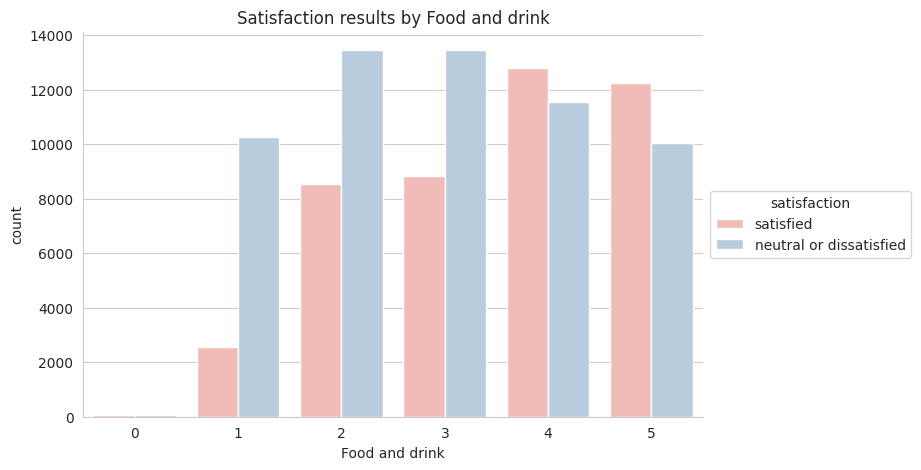

In [53]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Food and drink", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Food and drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [54]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,57,50,107,53.271028
1,1,10269,2568,12837,79.995326
2,2,13458,8530,21988,61.206112
3,3,13461,8839,22300,60.363229
4,4,11571,12788,24359,47.501950
5,5,10063,12250,22313,45.099269


In [55]:
# calcuate dissatisfied_rate for  Food and drink - business
pivot_satisfaction(business,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,23,32,55,41.818182
1,1,5749,2062,7811,73.601331
2,2,7146,7862,15008,47.614606
3,3,7121,8165,15286,46.585111
4,4,5584,12073,17657,31.624851
5,5,4286,11552,15838,27.061498


In [56]:
# calcuate dissatisfied_rate for Food and drink -  personal
pivot_satisfaction(personal,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,34,18,52,65.384615
1,1,4520,506,5026,89.932352
2,2,6312,668,6980,90.429799
3,3,6340,674,7014,90.390647
4,4,5987,715,6702,89.331543
5,5,5777,698,6475,89.220077


##Online boarding


Secara umum, tampaknya layanan online boarding memiliki dampak signifikan pada tingkat kepuasan keseluruhan pelanggan. Namun, dampak ini dirasakan lebih oleh pelanggan bisnis. Jika mereka mengalami layanan online boarding yang sangat baik, mereka lebih cenderung memberikan penilaian yang tinggi terhadap layanan tersebut. Tampaknya bagi para pelanggan bisnis, mereka sangat menghargai kenyamanan, dan oleh karena itu, memastikan layanan semacam itu akan menarik lebih banyak pelanggan bisnis Untuk yang lainnya, meskipun mereka menghargai layanan ini, dampaknya pada kepuasan keseluruhan tidak se signifikan pelanggan bisnis.

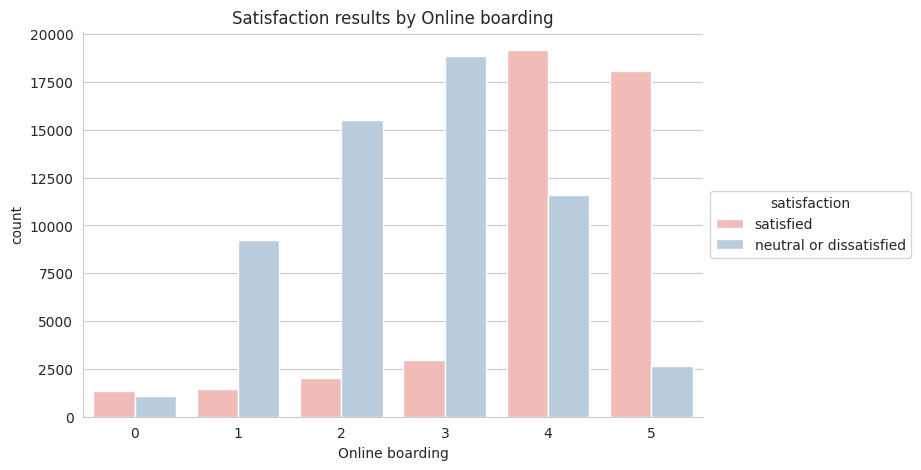

In [57]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Online boarding", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Online boarding")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [58]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1077,1351,2428,44.357496
1,1,9219,1473,10692,86.223345
2,2,15486,2019,17505,88.466153
3,3,18845,2959,21804,86.429096
4,4,11596,19166,30762,37.695859
5,5,2656,18057,20713,12.822865


In [59]:
# calcuate dissatisfied_rate for Online boarding - business
pivot_satisfaction(business,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,227,865,1092,20.787546
1,1,4748,1377,6125,77.518367
2,2,8211,1895,10106,81.248763
3,3,10616,2733,13349,79.526556
4,4,5868,17942,23810,24.645107
5,5,239,16934,17173,1.391720


In [60]:
# calcuate dissatisfied_rate for Online boarding - personal
pivot_satisfaction(personal,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,850,486,1336,63.622754
1,1,4471,96,4567,97.897964
2,2,7275,124,7399,98.324098
3,3,8229,226,8455,97.327025
4,4,5728,1224,6952,82.393556
5,5,2417,1123,3540,68.276836


##Seat comfort

Seperti beberapa variabel sebelumnya, kenyamanan kursi pada tingkat keseluruhan menunjukkan bahwa mereka yang memberikan peringkat kursi sebagai sangat nyaman, juga memberikan penilaian tinggi untuk pengalaman keseluruhan dengan maskapai. Bagi pelanggan bisnis, di mana jika kursi dianggap sangat nyaman, tingkat ketidakpuasan turun menjadi 28% atau lebih rendah.

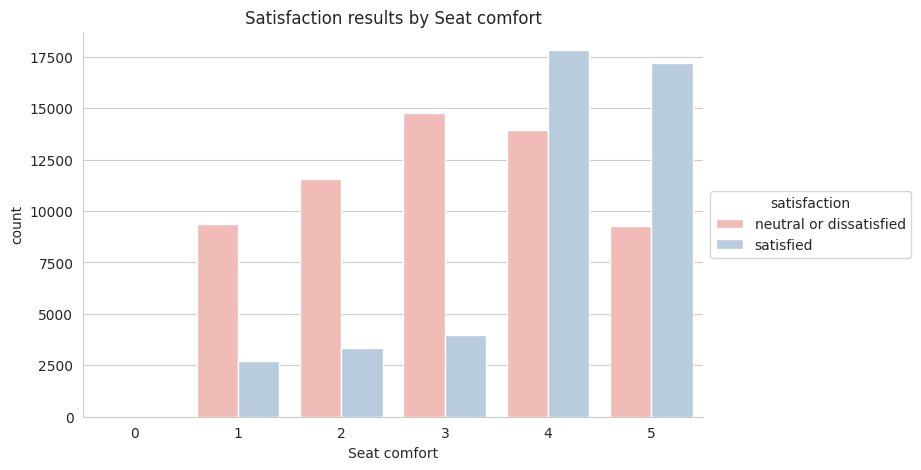

In [61]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Seat comfort", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Seat comfort")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [62]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,9380,2695,12075,77.681159
2,2,11558,3339,14897,77.586091
3,3,14741,3955,18696,78.845742
4,4,13940,17825,31765,43.884779
5,5,9259,17211,26470,34.979222


In [63]:
# calcuate dissatisfied_rate for Seat comfort -business
pivot_satisfaction(business,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,4732,2177,6909,68.490375
2,2,6533,2762,9295,70.285100
3,3,9005,3357,12362,72.844200
4,4,6730,16957,23687,28.412209
5,5,2908,16493,19401,14.988918


Untuk perjalanan pribadi, kenyamanan kursi tampaknya tidak memiliki dampak yang signifikan karena tingkat ketidakpuasan berkisar antara 89 hingga 90%.

In [64]:
# calcuate dissatisfied_rate for Seat comfort -personal
pivot_satisfaction(personal,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4648,518,5166,89.972900
1,2,5025,577,5602,89.700107
2,3,5736,598,6334,90.558889
3,4,7210,868,8078,89.254766
4,5,6351,718,7069,89.842976


##Inflight entertainment / onboard service

Kecenderungan dalam kenyamanan kursi juga tercermin dalam hiburan di dalam pesawat dan layanan di dalam pesawat. Semakin baik pengalaman tersebut, semakin tinggi penilaian kepuasan. Namun, pelanggan bisnis lebih peka terhadap hal ini daripada pelanggan perjalanan pribadi. Pelanggan perjalanan pribadi mempertahankan tingkat ketidakpuasan yang sama terlepas dari penilaian mereka terhadap hiburan di dalam pesawat atau layanan di dalam pesawat.

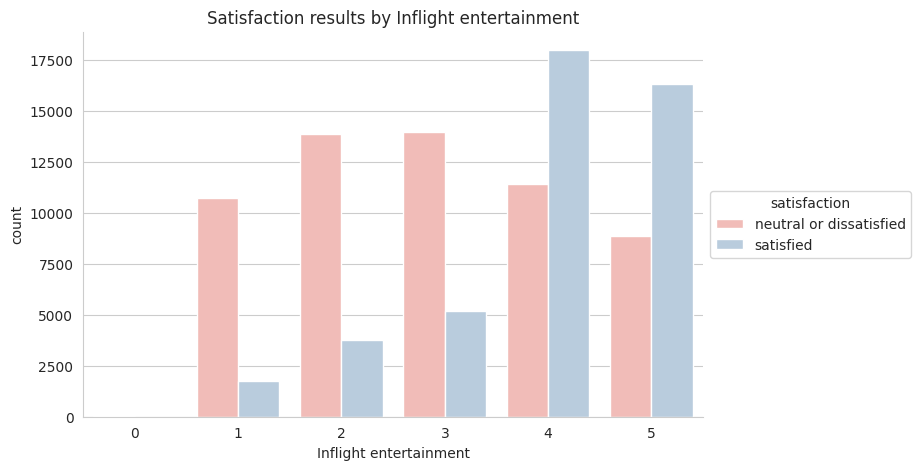

In [65]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight entertainment", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Inflight entertainment")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [66]:
# calcuate dissatisfied_rate for subset
pivot_satisfaction(train,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,14,0,14,100.000000
1,1,10733,1745,12478,86.015387
2,2,13875,3762,17637,78.669842
3,3,13970,5169,19139,72.992319
4,4,11423,18000,29423,38.823369
5,5,8864,16349,25213,35.156467


In [67]:
# calcuate dissatisfied_rate for Inflight entertainment - business
pivot_satisfaction(business,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,14,0,14,100.000000
1,1,5742,1156,6898,83.241519
2,2,7949,3090,11039,72.008334
3,3,7861,4490,12351,63.646668
4,4,5355,17314,22669,23.622568
5,5,2988,15696,18684,15.992293


In [68]:
# calcuate dissatisfied_rate for Inflight entertainment -  personal
pivot_satisfaction(personal,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4991,589,5580,89.444444
1,2,5926,672,6598,89.815095
2,3,6109,679,6788,89.997054
3,4,6068,686,6754,89.843056
4,5,5876,653,6529,89.998468


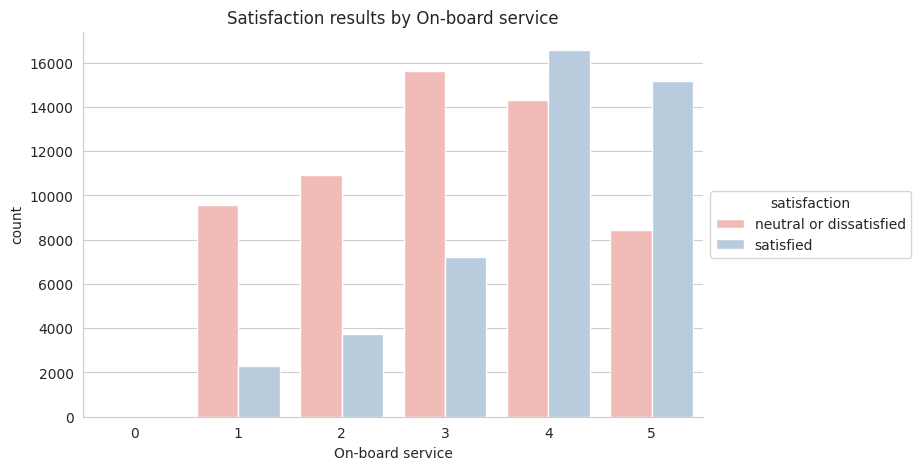

In [69]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="On-board service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by On-board service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [70]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,9572,2300,11872,80.626685
2,2,10927,3754,14681,74.429535
3,3,15625,7208,22833,68.431656
4,4,14296,16571,30867,46.314835
5,5,8456,15192,23648,35.757781


In [71]:
# calcuate dissatisfied_rate for On-board service - business
pivot_satisfaction(business,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,5790,1851,7641,75.775422
2,2,6850,3318,10168,67.368214
3,3,8066,6345,14411,55.971133
4,4,6804,15701,22505,30.233281
5,5,2396,14531,16927,14.154900


In [72]:
# calcuate dissatisfied_rate for On-board service - personal
pivot_satisfaction(personal,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,3782,449,4231,89.387852
1,2,4077,436,4513,90.339021
2,3,7559,863,8422,89.753028
3,4,7492,870,8362,89.595790
4,5,6060,661,6721,90.165154


Melalui sisa variabel yang menilai layanan, pola ini terus berlanjut di mana pelanggan perjalanan pribadi tetap tidak terpengaruh dalam ketidakpuasan mereka terhadap layanan, terlepas dari seberapa baik satu aspek dari layanan tersebut.

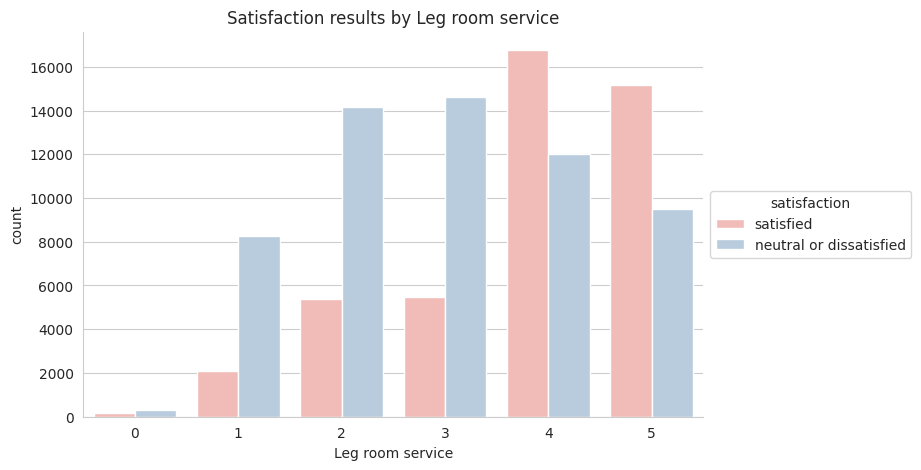

In [73]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Leg room service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Leg room service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [74]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Leg room service")

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,306,166,472,64.830508
1,1,8253,2100,10353,79.716024
2,2,14162,5363,19525,72.532650
3,3,14623,5475,20098,72.758483
4,4,12025,16764,28789,41.769426
5,5,9510,15157,24667,38.553533


In [75]:
# calcuate dissatisfied_rate for Leg room service - business
pivot_satisfaction(business,"Leg room service")

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,72,0,72,100.000000
1,1,4821,1825,6646,72.539874
2,2,7207,4789,11996,60.078359
3,3,7421,4897,12318,60.245170
4,4,5910,15899,21809,27.098904
5,5,4478,14336,18814,23.801424


In [76]:
# calcuate dissatisfied_rate for Leg room service - personal
pivot_satisfaction(personal,"Leg room service")

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,234,166,400,58.500000
1,1,3432,275,3707,92.581602
2,2,6955,574,7529,92.376146
3,3,7202,578,7780,92.570694
4,4,6115,865,6980,87.607450
5,5,5032,821,5853,85.973005


Tampaknya, untuk memuaskan pelanggan perjalanan pribadi, seluruh layanan harus luar biasa.

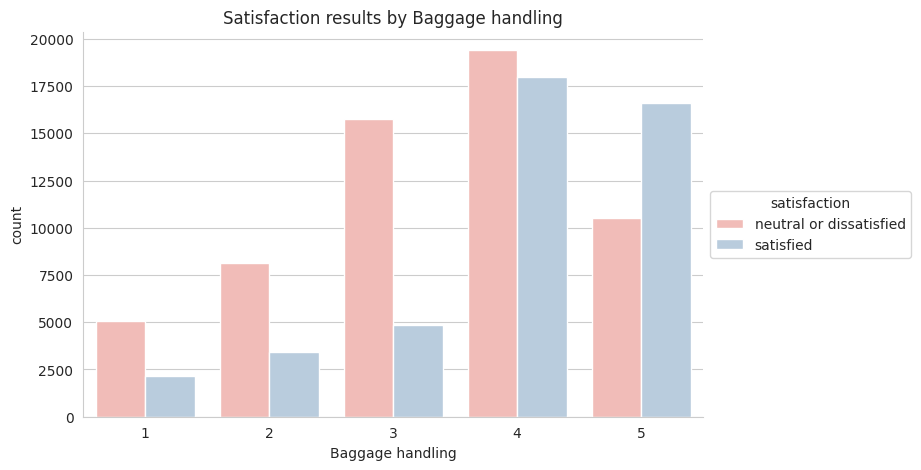

In [77]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Baggage handling", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Baggage handling")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [78]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Baggage handling")

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,5083,2154,7237,70.236286
1,2,8117,3404,11521,70.453954
2,3,15766,4866,20632,76.415277
3,4,19405,17978,37383,51.908622
4,5,10508,16623,27131,38.730603


In [79]:
# calcuate dissatisfied_rate for Baggage handling - business
pivot_satisfaction(business,"Baggage handling")

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2571,1856,4427,58.075446
1,2,4808,3042,7850,61.248408
2,3,10025,4227,14252,70.341005
3,4,9636,16860,26496,36.367754
4,5,2869,15761,18630,15.399893


In [80]:
# calcuate dissatisfied_rate for Baggage handling - personal
pivot_satisfaction(personal,"Baggage handling")

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2512,298,2810,89.395018
1,2,3309,362,3671,90.138927
2,3,5741,639,6380,89.984326
3,4,9769,1118,10887,89.730872
4,5,7639,862,8501,89.860016


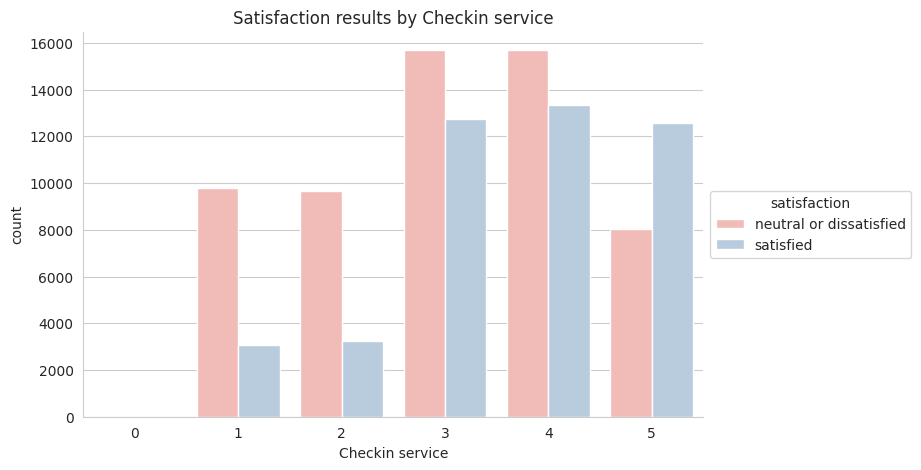

In [81]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Checkin service", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Checkin service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [82]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Checkin service")

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,9806,3084,12890,76.074476
2,2,9640,3253,12893,74.769255
3,3,15694,12752,28446,55.171202
4,4,15692,13363,29055,54.007916
5,5,8046,12573,20619,39.022261


In [83]:

# calcuate dissatisfied_rate for Checkin service - business
pivot_satisfaction(business,"Checkin service")

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,6365,2707,9072,70.160935
2,2,6254,2874,9128,68.514461
3,3,7658,11812,19470,39.332306
4,4,7461,12447,19908,37.477396
5,5,2170,11906,14076,15.416311


In [84]:
# calcuate dissatisfied_rate for Checkin service - personal
pivot_satisfaction(personal,"Checkin service")

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,3441,377,3818,90.125720
1,2,3386,379,3765,89.933599
2,3,8036,940,8976,89.527629
3,4,8231,916,9147,89.985788
4,5,5876,667,6543,89.805899


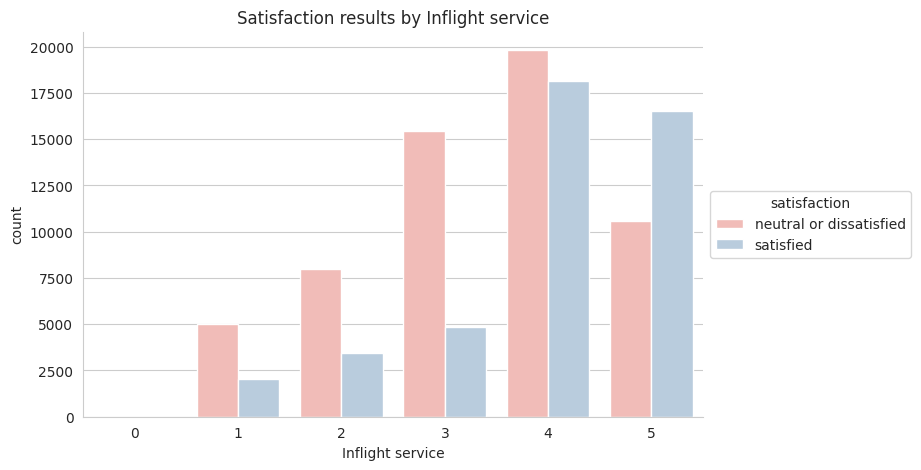

In [85]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight service", data = train, hue ="satisfaction",palette ="Pastel1" )
plt.title("Satisfaction results by Inflight service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [86]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Inflight service")

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,5030,2054,7084,71.005082
2,2,8006,3451,11457,69.878677
3,3,15448,4851,20299,76.102271
4,4,19816,18129,37945,52.222954
5,5,10576,16540,27116,39.002803


In [87]:
# calcuate dissatisfied_rate for Inflight service - business
pivot_satisfaction(business,"Inflight service")

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,2611,1796,4407,59.246653
2,2,4819,3084,7903,60.976844
3,3,9843,4241,14084,69.887816
4,4,9696,16927,26623,36.419637
5,5,2937,15698,18635,15.760665


In [88]:
# calcuate dissatisfied_rate for Inflight service - personal
pivot_satisfaction(personal,"Inflight service")

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2419,258,2677,90.362346
1,2,3187,367,3554,89.673607
2,3,5605,610,6215,90.185036
3,4,10120,1202,11322,89.383501
4,5,7639,842,8481,90.071925


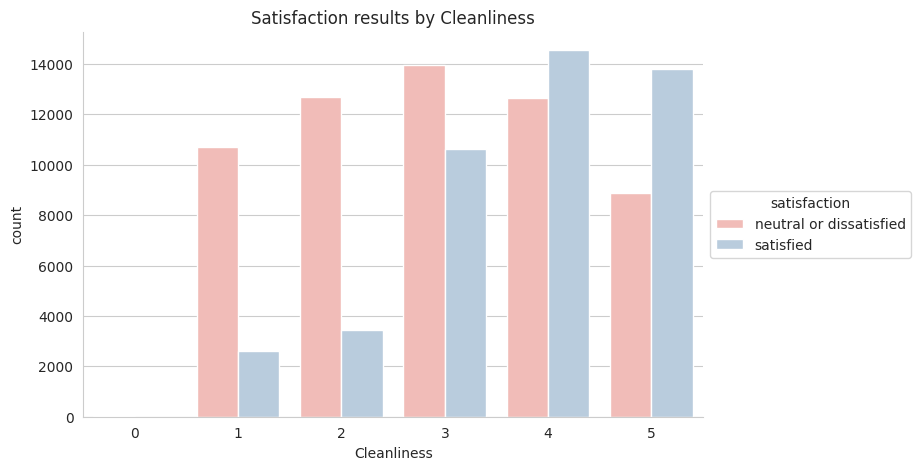

In [89]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Cleanliness", data = train, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [90]:
# calcuate dissatisfied_rate
pivot_satisfaction(train,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,12,0,12,100.000000
1,1,10705,2613,13318,80.379937
2,2,12696,3436,16132,78.700719
3,3,13961,10613,24574,56.812078
4,4,12629,14550,27179,46.466022
5,5,8876,13813,22689,39.120279


In [91]:
# calcuate dissatisfied_rate for Cleanliness - business
pivot_satisfaction(business,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,12,0,12,100.000000
1,1,6124,2070,8194,74.737613
2,2,7326,2836,10162,72.092108
3,3,7397,9903,17300,42.757225
4,4,6075,13798,19873,30.569114
5,5,2975,13139,16114,18.462207


In [92]:
# calcuate dissatisfied_rate for Cleanliness - personal
pivot_satisfaction(personal,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4581,543,5124,89.402810
1,2,5370,600,5970,89.949749
2,3,6564,710,7274,90.239208
3,4,6554,752,7306,89.707090
4,5,5901,674,6575,89.749049


Kesimpulan khusus untuk analisis kepuasan pelanggan terhadap service maskapai bahwa layanan telah direview secara individu. Namun, data menunjukkan bahwa tingkat kepuasan keseluruhan dapat diestimasi ketika skor layanan individu dievaluasi secara keseluruhan. Secara umum, khususnya untuk pelanggan bisnis, tingkat kepuasan turun secara signifikan jika skor totalnya lebih dari 75%. Meskipun fluktuasinya tidak sejelas pada kategori sebelumnya, bahkan di antara pelanggan perjalanan pribadi, jika mereka memberi skor layanan sebesar 75%, pengalaman keseluruhan mereka dinilai memuaskan sebanyak 20,7% dibandingkan dengan sedikit lebih dari 8% jika layanan dinilai di bawah 75%.

##Departure Delay in Minutes

Karena variabel Keterlambatan Keberangkatan dalam Menit, bisa sulit untuk dipahami secara visual.

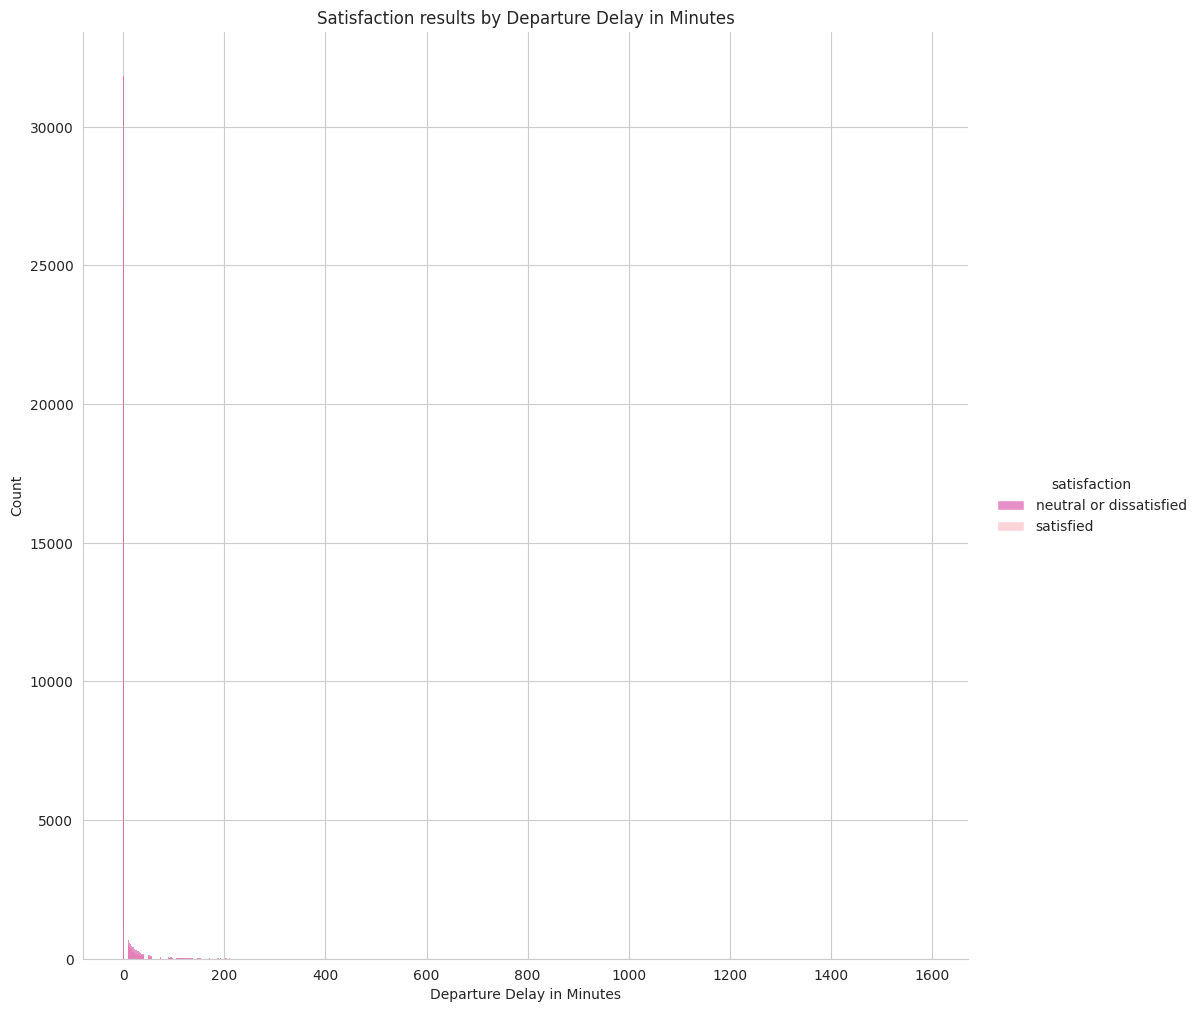

In [93]:
# create graph
sns.displot(x = "Departure Delay in Minutes", data = train, hue ="satisfaction",
            height = 10,palette ="RdPu_r" )

# format graph
plt.title("Satisfaction results by Departure Delay in Minutes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [94]:
# view statiscal data for depature delay in mins
train["Departure Delay in Minutes"].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

##Arrival Delay in Minutes

Masalah dengan keterlambatan keberangkatan juga berlaku untuk keterlambatan kedatangan. Oleh karena itu, kelompok yang serupa dapat dilakukan pada variabel ini. Ini mengungkapkan tren yang serupa dengan keterlambatan keberangkatan. Namun, setelah 12 jam, pelanggan bisnis dan penumpang pada umumnya mencatat penurunan ketidakpuasan.

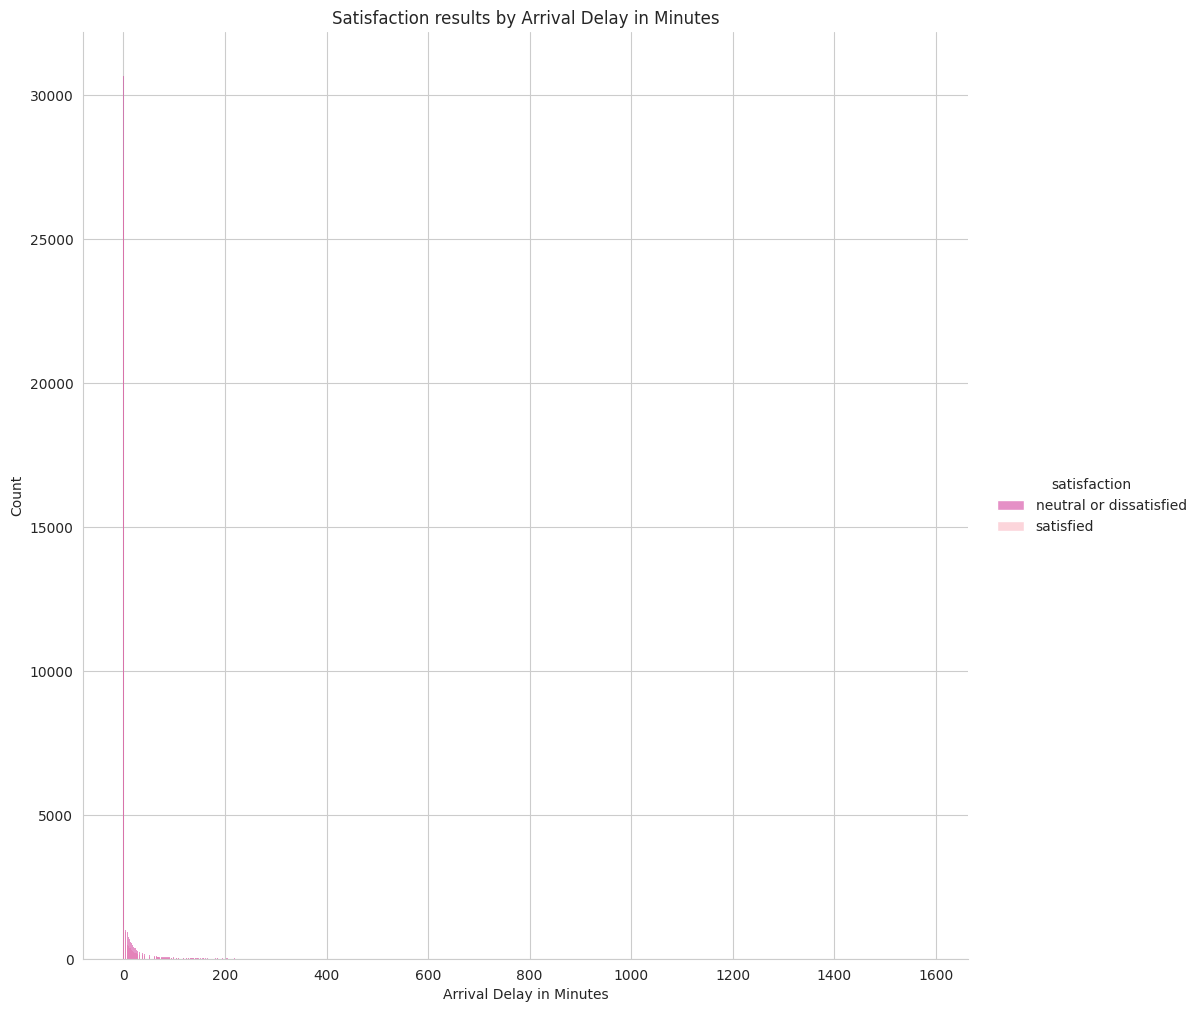

In [95]:
# create graph
sns.displot(x = "Arrival Delay in Minutes", data = train, hue ="satisfaction",
            height = 10,palette ="RdPu_r" )

# format graph
plt.title("Satisfaction results by Arrival Delay in Minutes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

##Consultion Exploratory Data Analysis

Kesimpulan sementara dari hasil exploratory data analysis, yaitu meneliti hasil umpan balik penumpang maskapai. Seperti yang ditemukan dalam analisis, ada beberapa masalah dengan umpan balik yang dapat menyebabkan masalah di masa depan, seperti peserta yang relatif muda dan klasifikasi gender biner. Yang paling mengkhawatirkan yaitu kepuasan pelanggan adalah klasifikasi biner. Oleh karena itu, maskapai tidak dapat membedakan dalam kategori netral hingga tidak puas, sejauh mana masalah tersebut. Ada juga aspek seperti harga tiket, lokasi penerbangan yang juga tidak ada dalam dataset ini.

Meskipun demikian, tampaknya maskapai memiliki kekuatan dalam melayani pelanggan bisnis. Namun, penawaran mereka terutama untuk penerbangan ekonomi tampaknya lemah. Penumpang juga tampak peka terhadap beberapa aspek layanan mereka, dan sebagai hasilnya, maskapai seharusnya menangani masalah tersebut sebagai prioritas untuk meningkatkan layanan. Ini termasuk layanan wifi di dalam pesawat dan waktu keberangkatan. Meski begitu, jika maskapai ingin terus fokus pada pelanggan bisnis, aspek-aspek seperti pemesanan online dan kenyamanan kursi harus diprioritaskan. Pemberitahuan juga bahwa ini adalah hasil analisis dari data mentah artinya analisis dengan data yang belum di efektifkan sehingga masih perlu di analisa ulang.

##**Verify Data Quality**

####Missing Values

In [96]:
# check for missing values in train dataset
train.isnull().sum().reset_index(name = "Null values").set_index("index")

,Null values
index,
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0


In [97]:
print((train.isna().sum() / len(train)) * 100)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

Pada dataset ini terlihat bahwa masing-masing kolom relatif aman. Hanya saja, ada sebanyak 310 data atau sebnyak 0,3% data yang positif dinyatakan kosong atau dengan kata lain nilai data ini tidak tersedia, yaitu pada kolom "Arrival Delay in Minutes". Tapi ini wajar saja, karena akan saya atasi nanti pada saat data preperation.

####Outliers Values

In [98]:
results = []

cols = train.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = train[col].quantile(0.25)
  q3 = train[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(train))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
id,0.000000
Age,0.000000
Flight Distance,2.204920
Inflight wifi service,0.000000
Departure/Arrival time convenient,0.000000
Ease of Online booking,0.000000
Gate location,0.000000
Food and drink,0.000000
Online boarding,0.000000



1.   ID: Tidak ada outlier dalam kolom ini, yang berarti dalam dataset tidak secara signifikan ekstrem.

1.   Age: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar umur penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Flight distance: Persentase outlier pada kolom ini sebesar 2.20% menunjukkan adanya beberapa nilai yang tidak biasa dalam penilaian penumpang.

1.   Inflight wifi service: Tidak ada outlier dalam kolom ini, yang berarti Inflight wifi service dalam dataset tidak secara signifikan ekstrem.

2.   Departure/Arrival time convenient: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

1.   Ease of Online booking: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Gate location: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

1.   Food and drink: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Online boarding: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

1.   Seat comfort: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Inflight entertainment: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

1.   On-board service: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Leg room service: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

1.   Baggage handling: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Check-in service: Persentase outlier pada kolom ini sebesar 12.41% menunjukkan adanya beberapa nilai yang tidak biasa dalam penilaian penumpang.

1.   Inflight service: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

2.   Cleanliness: Tidak ada outlier dalam kolom ini, yang berarti sebagian besar peratingan penumpang dalam dataset tidak secara signifikan ekstrem.

1.   Departure Delay in Minutes: Persentase outlier pada kolom ini sebesar 13.98% menunjukkan adanya beberapa nilai yang tidak biasa dalam penilaian penumpang.

2.   Arrival Delay in Minutes: Persentase outlier pada kolom ini sebesar 13.43% menunjukkan adanya beberapa nilai yang tidak biasa dalam penilaian penumpang.

####Duplicated Values

In [99]:
# Menampilkan jumlah kolom data duplikat
print(train.duplicated().sum())

0


In [100]:
train[train.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,distance_group


In [101]:
# Mengecek nilai duplikat pada setiap kolom
print("KETERANGAN: False(Tidak Terduplikasi) / True(Terduplikasi)")
print("")

# Membuat tabel untuk menyimpan hasil pemeriksaan nilai duplikat
tabel_hasil = PrettyTable()
tabel_hasil.field_names = ["Kolom", "Nilai Duplikat"]

# Pemeriksaan nilai duplikat untuk setiap kolom
for kolom in train.columns:
    duplikat_kolom = train[kolom].duplicated()
    tabel_hasil.add_row([kolom, duplikat_kolom.any()])

# Menampilkan tabel
print(tabel_hasil)

KETERANGAN: False(Tidak Terduplikasi) / True(Terduplikasi)

+-----------------------------------+----------------+
|               Kolom               | Nilai Duplikat |
+-----------------------------------+----------------+
|             Unnamed: 0            |     False      |
|                 id                |     False      |
|               Gender              |      True      |
|           Customer Type           |      True      |
|                Age                |      True      |
|           Type of Travel          |      True      |
|               Class               |      True      |
|          Flight Distance          |      True      |
|       Inflight wifi service       |      True      |
| Departure/Arrival time convenient |      True      |
|       Ease of Online booking      |      True      |
|           Gate location           |      True      |
|           Food and drink          |      True      |
|          Online boarding          |      True      |
|    

In [102]:
train[train.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,distance_group


Pada bagian ini terlihat bahwa tidak ada kolom yang terduplikasi. Namun terlihat pula bahwa semua nilai kolom, kecuali nilai kolom "unnamed" dan nilai kolom "ID" dinyatakan positif "True" atau terduplikasi. Itu artinya sebagian besar data terduplikasi, dan itu artinya semua nilai data ini perlu untuk dilakukan pembenahan ulang. Dan tentu saja ini akan saya atasi pada saat saya melakukan data preperation.

####Inconsistent Values / Noise (Optional)

In [103]:
[print(f"Columns -> {col}\n{train[col].unique()}\n{'-' * 30}\n") for col in train.columns]

Columns -> Unnamed: 0
[     0      1      2 ... 103901 103902 103903]
------------------------------

Columns -> id
[ 70172   5047 110028 ...  68825  54173  62567]
------------------------------

Columns -> Gender
['Male' 'Female']
------------------------------

Columns -> Customer Type
['Loyal Customer' 'disloyal Customer']
------------------------------

Columns -> Age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
------------------------------

Columns -> Type of Travel
['Personal Travel' 'Business travel']
------------------------------

Columns -> Class
['Eco Plus' 'Business' 'Eco']
------------------------------

Columns -> Flight Distance
[ 460  235 1142 ...  974 1479  400]
------------------------------

Columns -> Inflight wifi service
[3 2 4 1 5 0]
------------------------------

Columns -> Dep

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]


Berdasarkan output tersebut, dan menurut analisa saya jika dilihat secara langsung bahwa tidak ada nilai yang inkonsisten atau noise pada data ini. Itu artinya, setiap kolom memiliki nilai unik yang sesuai dengan jenis data yang diharapkan. Maka dari itu hasilnya none.

#DATA PREPERATION

##Data Cleaning

###Penanganan Missing Values

####Pengecekkan Missing Values

Dibawah ini merupakan proses pengecekkan missing values, dimana outputnya akan tampil dalam bentu presentase yang dapat dijadikan sebagai pertimbangan dalam mengambil keputusan terhadap apa yang akan dilakukan jika ada nilai yang kosong

In [104]:
print((train.isna().sum() / len(train)) * 100)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [105]:
train[train['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,distance_group
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,2,4,1,1,5,31,NaN,satisfied,Young,less than 1500
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,3,3,4,38,NaN,neutral or dissatisfied,middle age,less than 1500
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,3,11,NaN,neutral or dissatisfied,Young,less than 1500
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,3,4,5,5,2,41,NaN,neutral or dissatisfied,Young,less than 1500
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,4,2,1,2,5,1,NaN,neutral or dissatisfied,Young,less than 1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,5,4,3,4,3,230,NaN,neutral or dissatisfied,middle age,less than 1500
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,1,2,4,2,3,55,NaN,neutral or dissatisfied,middle age,less than 1500
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,1,5,5,3,5,0,NaN,neutral or dissatisfied,Young,less than 1500
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,5,5,3,5,0,NaN,satisfied,middle age,less than 1500


Output tersebut menunjukkan adanya 310 nilai data yang kosong pada 'Arrival Delay in Minutes' dengan persentase 0,3%. Hal ini harus dilakukan pembersihan data. Karena persentasi ini kurang dari 70% maka saya akan mengimputasi data tersebut.

###Imputasi Missing Values

Untuk kolom ***Arrival Delay in Minutes'***, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***Age***

In [106]:
train['Arrival Delay in Minutes'].dropna().describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***Arrival Delay in Minutes*** untuk imputasi nilai kosong tersebut.

In [107]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].dropna().mean())

####Pengecekkan Hasil

In [108]:
print((train.isna().sum() / len(train)) * 100)

Unnamed: 0                           0.0
id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction    

Terlihat bahwa data yang kosong ada di kolom Arrival Delay in Minutes dengan rata-rata atau mean sebesar 15.178678. Maka nilai mean inilah yang menjadi penengah untuk mengatasi masalah missing values dengan cara mengimputasi data, sehingga pada output akhir menunjukkan bahwa data ini berhasil dibersihkan dengan persentse 0.0% missing values atau dengan kata lain sudah tidak ada nilai data yang missing.

###Penanganan Duplicated Values

####Pengecekkan Nilai Duplikat

In [109]:
train[train.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,distance_group


Output tersebut menunjukkan bahwa tidak ada baris yang dideteksi sebagai duplikat dalam dataset. Hal ini ditunjukkan dengan angka 0 pada baris, yang menunjukkan bahwa tidak ada baris yang sepenuhnya identik dengan baris lainnya. Itu artinya tidak perlu dilakukan penanganan untuk duplikated values.

###Penanganan Outliers

####Pengecekkan Outliers

In [110]:
results = []

cols = train.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = train[col].quantile(0.25)
  q3 = train[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(train))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results = pd.DataFrame(results)
results.set_index('Kolom', inplace=True)
results = results.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
id,0.000000
Age,0.000000
Flight Distance,2.204920
Inflight wifi service,0.000000
Departure/Arrival time convenient,0.000000
Ease of Online booking,0.000000
Gate location,0.000000
Food and drink,0.000000
Online boarding,0.000000


Output tersebut menunjukkan besaran persentase outliers untuk setiap kolom dalam dataset. Jika persentase outliers rendah atau dekat dengan nol, maka itu artinya mayoritas data berada dalam kisaran yang normal. Sebaliknya, jika persentase outliers tinggi, maka bisa menandakan bahwa beberapa data dalam kolom memiliki nilai yang sangat ekstrem. Pada tabel di atas ada 4 data yang harus dilakukan penanganan outliers yaitu: Flight Distance, On-board service, Departure Delay in Minutes, dan Arrival Delay in Minutes.

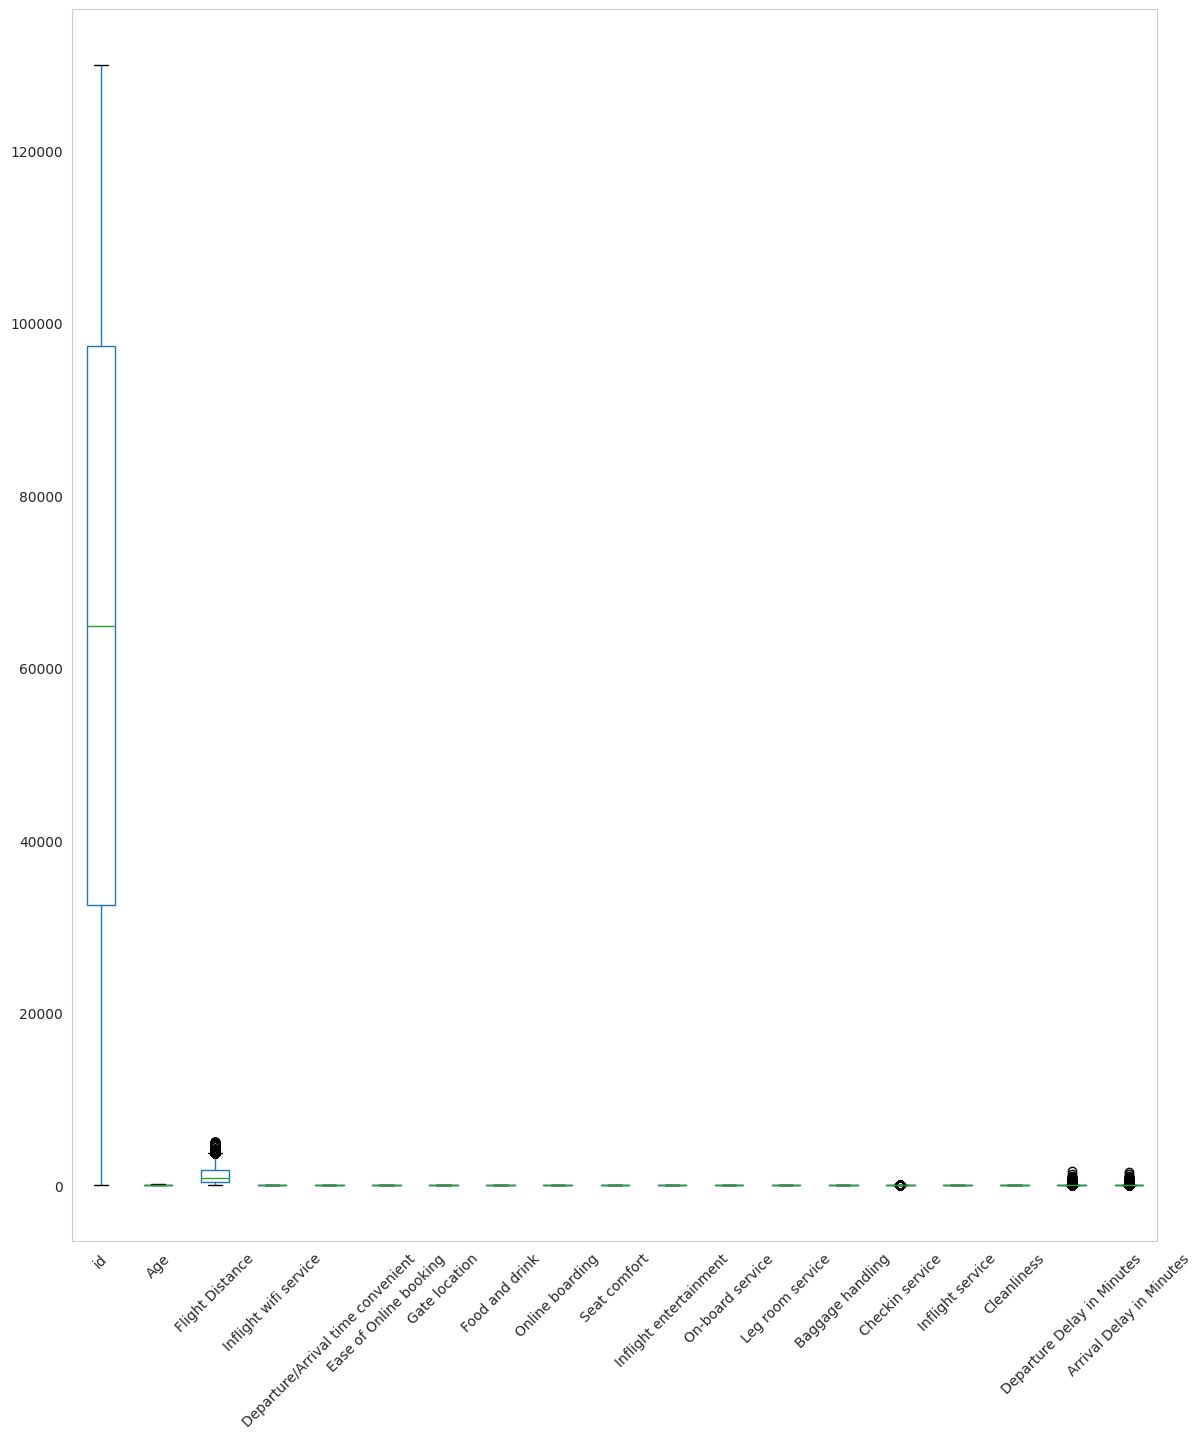

In [111]:
boxplot = train.drop('Unnamed: 0', axis=1).boxplot(grid=False, rot=45,  figsize=(14,16))

Outliers dapat menyebabkan distorsi dalam analisis statistik dan model machine learning. Dengan menghapus atau menyesuaikan outliers, kita dapat meningkatkan kualitas hasil analisis dan prediksi. Oleh karena itu, pembersihan outliers bertujuan untuk memastikan bahwa analisis data kita menghasilkan hasil yang lebih akurat, dapat dipercaya, dan representatif dari fenomena yang sedang diamati.

####Imputasi Outliers

Melakukkan flooring dan capping pada kolom Flight Distance, On-board service, Departure Delay in Minutes, dan Arrival Delay in Minutes.

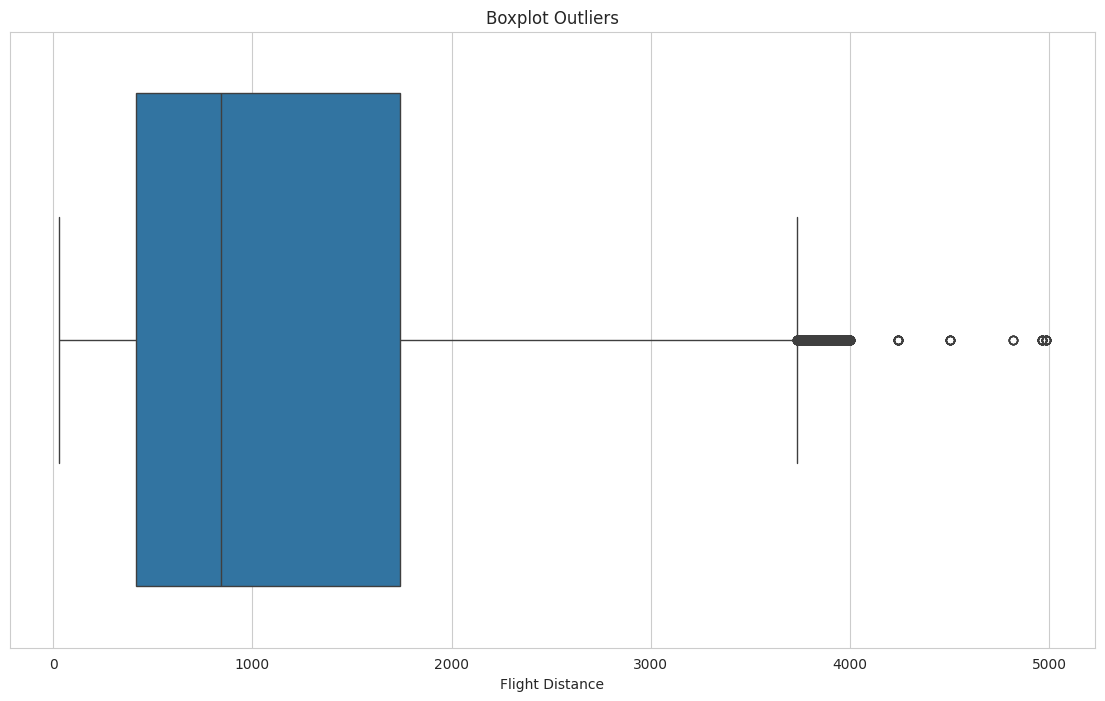

In [112]:
columns = ["Flight Distance"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=train[col])
  plt.title("Boxplot Outliers")
  plt.show()


In [113]:
Q1 = train['Flight Distance'].quantile(0.25)
Q3 = train['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train = train[(train['Flight Distance'] >= lower_bound) & (train['Flight Distance'] <= upper_bound)]


Proses tersebut bertujuan untuk menangani outliers dalam dataset Flight Distance. Pendekatan ini menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Kemudian, batas bawah (lower_whisker) dan batas atas (upper_whisker) dihitung dengan menggunakan IQR dan faktor pemanjangan sebesar 1.5. Nilai-nilai di bawah batas bawah akan digantikan dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan digantikan dengan batas atasnya.

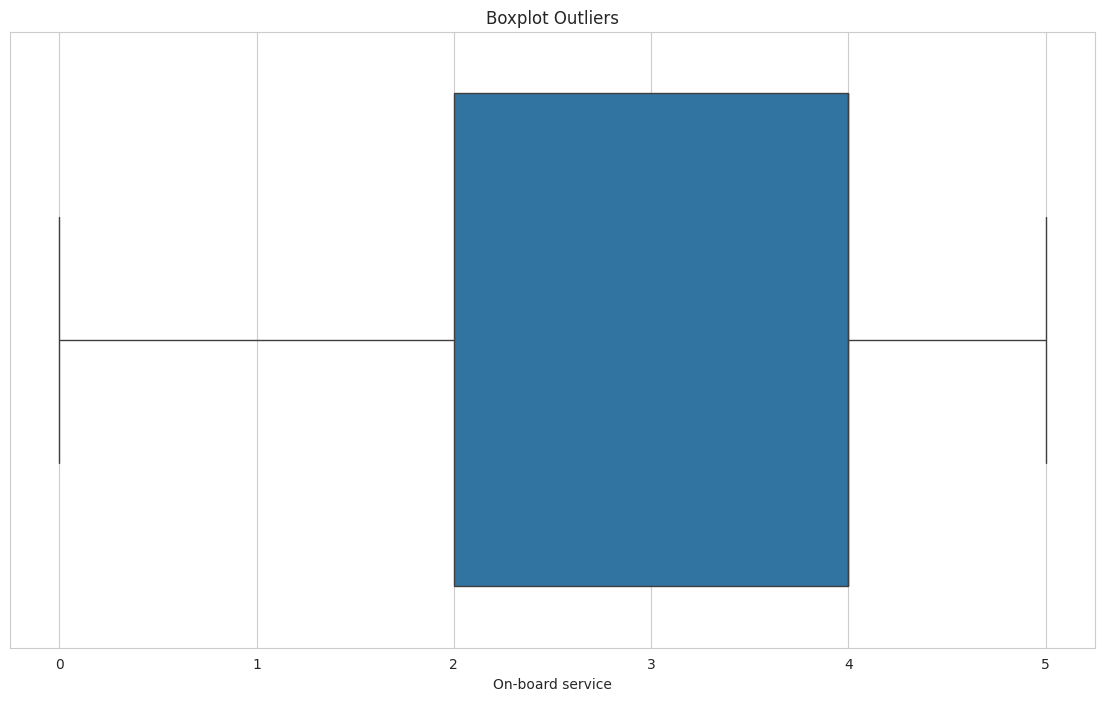

In [114]:
columns = ["On-board service"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=train[col])
  plt.title("Boxplot Outliers")
  plt.show()

In [115]:
Q1 = train['On-board service'].quantile(0.25)
Q3 = train['On-board service'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train = train[(train['On-board service'] >= lower_bound) & (train['On-board service'] <= upper_bound)]


Proses tersebut bertujuan untuk menangani outliers dalam dataset On-board service. Pendekatan ini menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Kemudian, batas bawah (lower_whisker) dan batas atas (upper_whisker) dihitung dengan menggunakan IQR dan faktor pemanjangan sebesar 1.5. Nilai-nilai di bawah batas bawah akan digantikan dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan digantikan dengan batas atasnya.

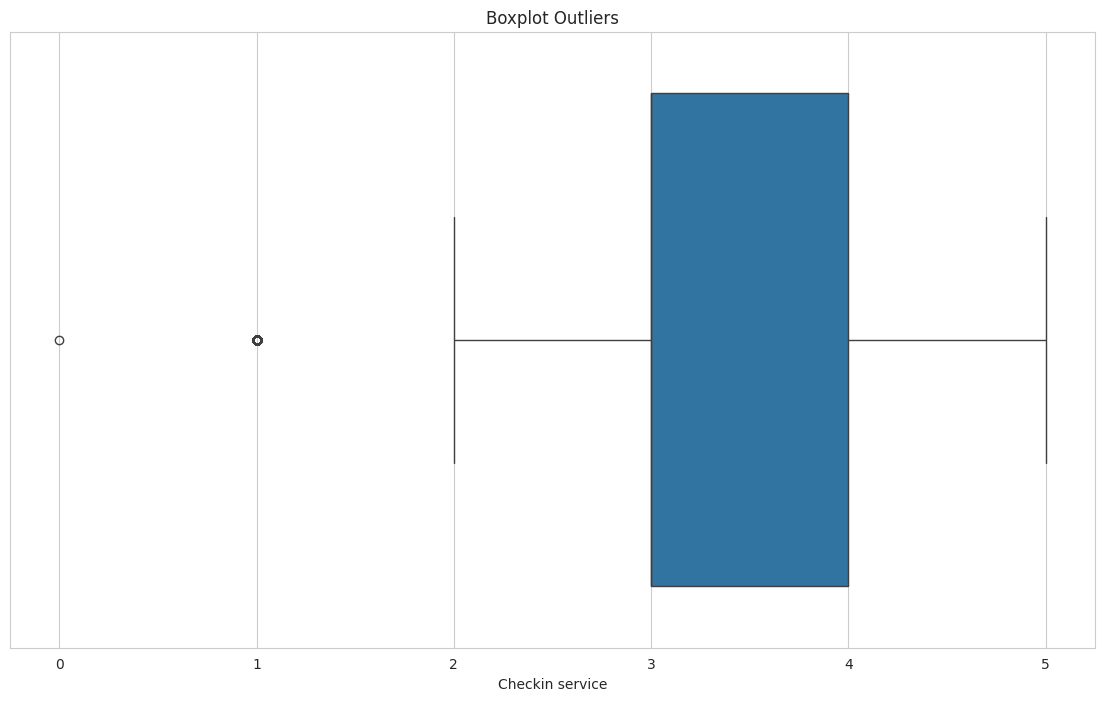

In [116]:
columns = ["Checkin service"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=train[col])
  plt.title("Boxplot Outliers")
  plt.show()

In [117]:
Q1 = train['Checkin service'].quantile(0.25)
Q3 = train['Checkin service'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train = train[(train['Checkin service'] >= lower_bound) & (train['Checkin service'] <= upper_bound)]


Proses tersebut bertujuan untuk menangani outliers dalam dataset Checkin service. Pendekatan ini menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Kemudian, batas bawah (lower_whisker) dan batas atas (upper_whisker) dihitung dengan menggunakan IQR dan faktor pemanjangan sebesar 1.5. Nilai-nilai di bawah batas bawah akan digantikan dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan digantikan dengan batas atasnya.

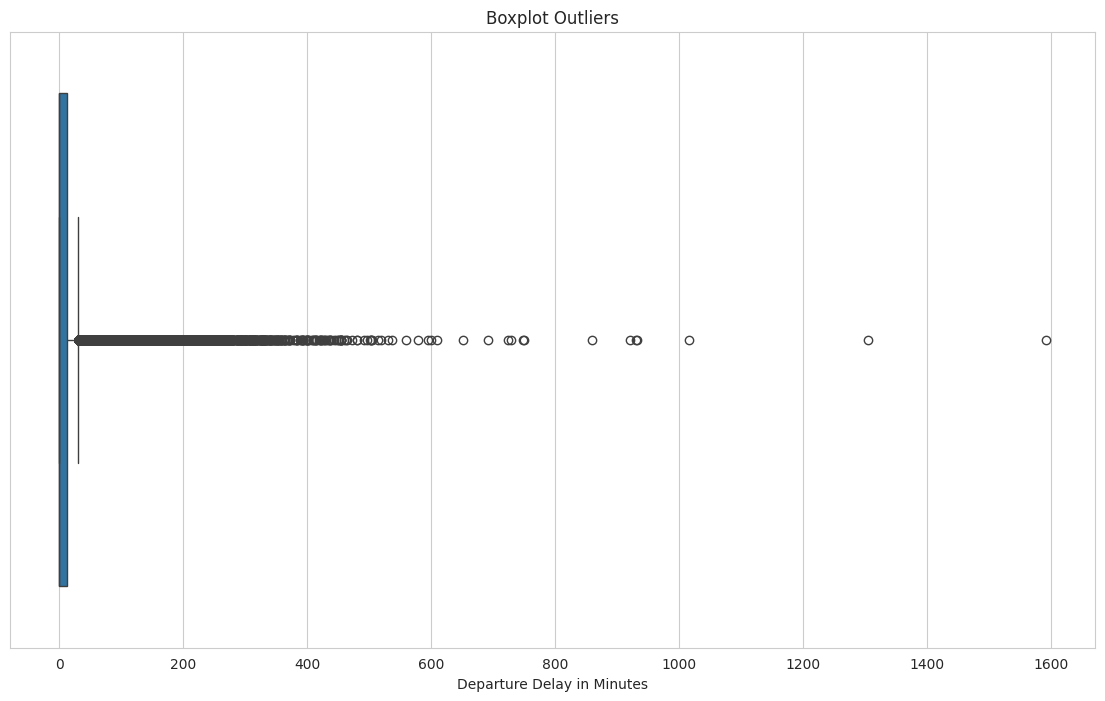

In [118]:
columns = ["Departure Delay in Minutes"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=train[col])
  plt.title("Boxplot Outliers")
  plt.show()

In [119]:
Q1 = train['Departure Delay in Minutes'].quantile(0.25)
Q3 = train['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train = train[(train['Departure Delay in Minutes'] >= lower_bound) & (train['Departure Delay in Minutes'] <= upper_bound)]


Proses tersebut bertujuan untuk menangani outliers dalam dataset Deparature Delay in Minutes. Pendekatan ini menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Kemudian, batas bawah (lower_whisker) dan batas atas (upper_whisker) dihitung dengan menggunakan IQR dan faktor pemanjangan sebesar 1.5. Nilai-nilai di bawah batas bawah akan digantikan dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan digantikan dengan batas atasnya.

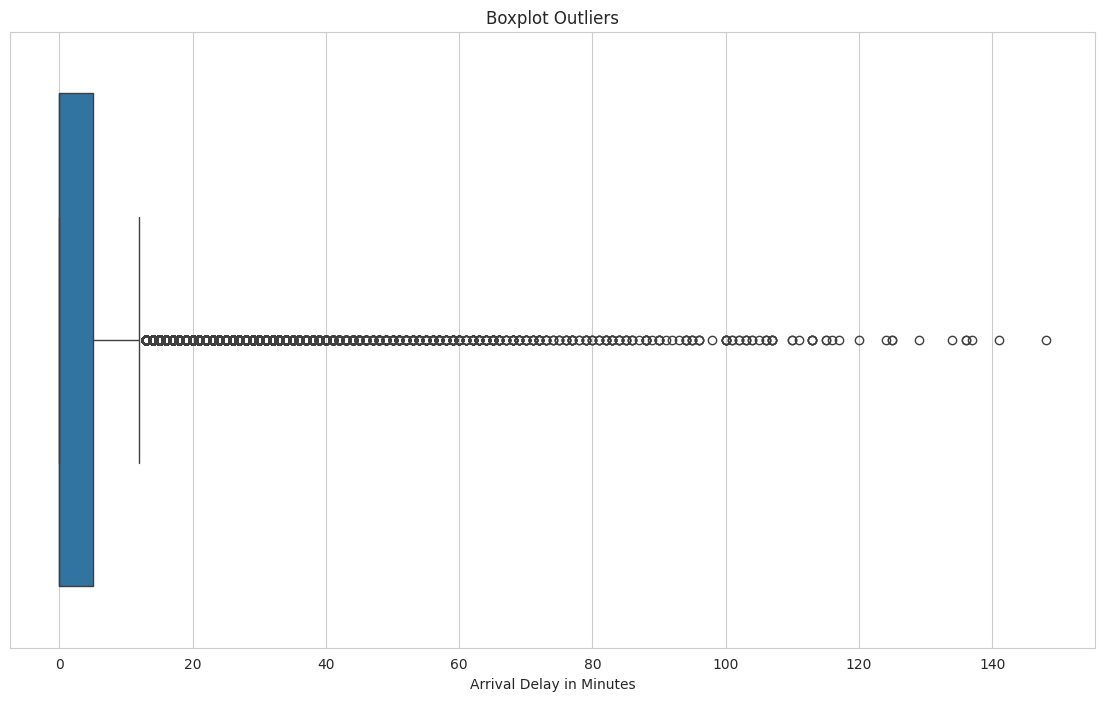

In [120]:
columns = ["Arrival Delay in Minutes"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=train[col])
  plt.title("Boxplot Outliers")
  plt.show()

In [121]:
Q1 = train['Arrival Delay in Minutes'].quantile(0.25)
Q3 = train['Arrival Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train = train[(train['Arrival Delay in Minutes'] >= lower_bound) & (train['Arrival Delay in Minutes'] <= upper_bound)]


Proses tersebut bertujuan untuk menangani outliers dalam dataset Arrival Delay in Minutes. Pendekatan ini menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Kemudian, batas bawah (lower_whisker) dan batas atas (upper_whisker) dihitung dengan menggunakan IQR dan faktor pemanjangan sebesar 1.5. Nilai-nilai di bawah batas bawah akan digantikan dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan digantikan dengan batas atasnya.

####Pengecekkan Hasil

In [122]:
results = []

cols = train.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = train[col].quantile(0.25)
  q3 = train[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(train))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
id,0.000000
Age,0.000000
Flight Distance,0.470677
Inflight wifi service,0.000000
Departure/Arrival time convenient,0.000000
Ease of Online booking,0.000000
Gate location,0.000000
Food and drink,0.000000
Online boarding,0.000000


Tabel diatas menampilkan nilai outliers pada kolom setiap kolom sudah berubah menjadi 0. Hal ini bisa disebabkan oleh proses flooring and capping yang dilakukan sebelumnya untuk mengatasi outliers dalam kolom tersebut. Dengan demikian, setiap kolom sudah tidak memiliki nilai outliers lagi setelah proses tersebut dilakukan.

###Construct Data

####Melakukan Rekayasa Fitur (Feature Engineering)

Setelah saya melakukan analisis pada dataset ini, saya tidak menemukan kolom atau fitur yang memerlukan rekayasa fitur tambahan. Sehingga, semua fitur yang ada dalam dataset telah relevan untuk dianalisis. Pada analisis ini hubungan antara kolom yang satu dengan kolom yang lain, saya rasa sudah cukup lengkap. Oleh karena itu, tidak diperlukan lagi pengembangan atau rekayasa fitur tambahan untuk meningkatkan kualitas analisis atau kinerja model. Data tersebut sudah cukup lengkap dan sesuai untuk analisis yang sedang dilakukan.

####Pengecekkan Hasil

In [123]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,distance_group
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,3,4,4,4,5,0,0.0,satisfied,Young,less than 1500
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,4,4,3,3,3,0,0.0,satisfied,senior,less than 1500
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,4,4,4,4,1,0,0.0,neutral or dissatisfied,Young,less than 1500
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,4,5,4,4,0.0,satisfied,middle age,more than 1500
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,2,1,4,1,2,0,0.0,neutral or dissatisfied,middle age,less than 1500


###Data Reduction

####Mengurangi Fitur -Fitur Yang Kurang Relevan

In [124]:
train_corr = train.corr(numeric_only=True)
px.imshow(train_corr)

Berdasarkan hasil analisis data, ditemukan bahwa ada fitur yang dianggap kurang relevan dalam dataset. Dalam hal ini yaitu fitur Unnamed: 0 dan fitur id. Kedua fitur ini tidak diperlukan karena hanya sebagai index tambahan untuk sebuah dataset. Oleh karena itu, perlu untuk dilakukan pembersihan sehingga dataset ini dapat memberikan wawasan dalam analisis yang lebih maksimal. Sebab analisis ini akan memfokuskan analisa terhadap fitur yang berkaitan langsung dengan kepuasaan pelanggan.

####Penghapusan Kolom Yang Kurang Relevan

Dalam hal ini yaitu kolom Unnamed: 0 dan kolom id

In [125]:
nama_kolom = 'Unnamed: 0'
train.drop(columns=[nama_kolom], inplace=True)

In [126]:
nama_kolom = 'id'
train.drop(columns=[nama_kolom], inplace=True)

####Pengecekkan Hasil

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66075 entries, 2 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             66075 non-null  object 
 1   Customer Type                      66075 non-null  object 
 2   Age                                66075 non-null  int64  
 3   Type of Travel                     66075 non-null  object 
 4   Class                              66075 non-null  object 
 5   Flight Distance                    66075 non-null  int64  
 6   Inflight wifi service              66075 non-null  int64  
 7   Departure/Arrival time convenient  66075 non-null  int64  
 8   Ease of Online booking             66075 non-null  int64  
 9   Gate location                      66075 non-null  int64  
 10  Food and drink                     66075 non-null  int64  
 11  Online boarding                    66075 non-null  in

Pada informasi terlihat bahwa kolom Unnamed: 0 dan kolom id sudah tidak ada. Itu artinya pembersihan fitur - fitur yang dirasa kurang relevan dengan analasis telah berhasil dilakukan sehingga akan memudahkan proses analisa serta dapat mengefesiensikan waktu menganalisa.

In [128]:
train_corr = train.corr(numeric_only=True)
px.imshow(train_corr)

Pada data tersebut terlihat bahwa tidak tampil lagi kolom Unnamed: 0 dan id. Hal ini menunjukkan keberhasilan dalam data reduction dengan mengurangi fitur - fitur yang kurang relevan sehingga dalam proses analisa memberikan dampak yang positif dan lebih efektif sehingga waktu yang diluangkan untuk analisis menjadi lebih efesien.

###Data Transformation

####Mapping

In [129]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,distance_group
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,Young,less than 1500
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,senior,less than 1500
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,4,4,4,4,1,0,0.0,neutral or dissatisfied,Young,less than 1500
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,4,5,4,4,0.0,satisfied,middle age,more than 1500
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,2,1,4,1,2,0,0.0,neutral or dissatisfied,middle age,less than 1500


In [171]:
train['satisfaction'] = train['satisfaction'].map({'satisfied': 0, 'neutral or dissatisfied': 1}).astype(int)

KeyError: 'satisfaction'

####Encoding

In [170]:
train = pd.get_dummies(train)

####Pengecekkan Hasil

In [172]:
train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,kmeans_cluster,hierarchy_cluster
0,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,0,0,1,1,3
1,61,214,3,3,3,3,4,5,5,3,...,0,1,0,1,0,0,0,1,1,3
2,26,1180,3,4,2,1,1,2,1,1,...,0,0,1,0,1,0,1,0,2,2
3,20,1061,3,3,3,4,2,3,3,2,...,1,1,0,0,1,0,1,0,3,1
4,24,1182,4,5,5,4,2,5,2,2,...,1,1,0,0,1,0,1,0,3,1


Tabel tersebut menampilkan hasil encoding yang diterapkan pada DataFrame awal. Setiap nilai kategorikal dalam DataFrame telah diubah menjadi kolom baru dengan nilai biner, yaitu 0 atau 1. Kolom-kolom baru ini mencerminkan setiap nilai unik dalam variabel kategorikal asli. Ketika suatu baris memiliki nilai tertentu dalam variabel kategorikal, maka kolom yang sesuai dengan nilai tersebut akan menunjukkan nilai 1, sementara kolom lainnya akan menunjukkan nilai 0.

In [133]:
#Menyimpan Data Yang Telah Di Cleaning
train.to_csv("Data Cleaned.csv")

###DATA MODELLING

Data Modelling dalam kasus ini akan menggunakan Modelling Associate dan Modelling Predict. Saya menggunakan pemodelan asosiasi untuk menemukan hubungan atau pola yang terjadi bersama-sama di dalam dataset. Tujuan utama dari pemodelan asosiasi ini adalah untuk mengidentifikasi korelasi antara item atau variabel dalam dataset. Kemudian juga, pemodelan prediksi yang saya gunakan untuk memprediksi nilai dari variabel target berdasarkan input variabel lainnya. Ini bertujuan untuk membuat prediksi yang akurat tentang apa yang akan terjadi di masa depan berdasarkan data historis. Maka dari itu saya menggunakan kedua model ini untuk menganalisis kepuasan penumpang maskapai penerbangan.

####Inisiasi Variabel untuk menyimpan Dataframe

In [134]:
train = pd.read_csv('https://raw.githubusercontent.com/uswatnkh07/Mini_Project1_DataMining/main/Data%20Cleaned.csv') #Dataframe yang telah dicleaning

In [135]:
train = train.drop('Unnamed: 0', axis=1)
train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,0,0,1
1,61,214,3,3,3,3,4,5,5,3,...,1,1,0,1,0,1,0,0,0,1
2,26,1180,3,4,2,1,1,2,1,1,...,0,1,0,0,1,0,1,0,1,0
3,20,1061,3,3,3,4,2,3,3,2,...,1,0,1,1,0,0,1,0,1,0
4,24,1182,4,5,5,4,2,5,2,2,...,0,0,1,1,0,0,1,0,1,0


###Modelling Associate

Menggunakan Modelling Associate untuk membuat kolom target yang akan digunakan pada proses Modelling Predict. Hal ini dilakukan karena pada dataset sebelumnya tidak terdapat kolom target.

####Pre-Processing

#####Adjusment

In [136]:
x_final = train

x_final merupakan dataframe baru yang berisi seluruh kolom dari dataframe df kecuali kolom "satisfied".

#####Normalisasi Data

In [137]:
scaler = MinMaxScaler()

In [138]:
x_final_norm = scaler.fit_transform(x_final)

Kode tersebut bertujuan untuk melakukan normalisasi atau penskalaan fitur-fitur dalam dataset x_final. Normalisasi data merupakan langkah penting dalam analisis data untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa, sehingga mempermudah proses perbandingan dan pemodelan data.

#####Validasi Silang

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

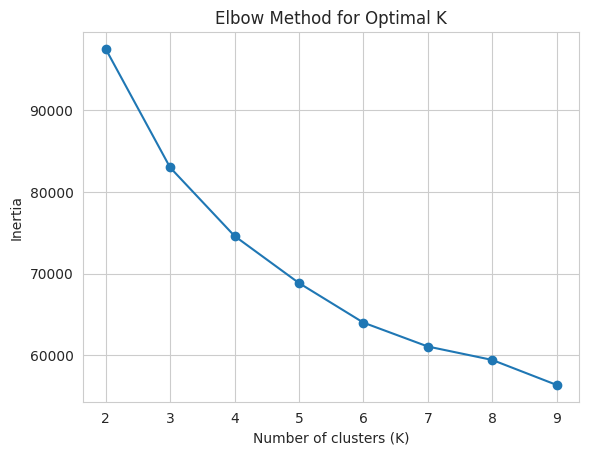

In [139]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Output tersebut dapat digunakan untuk menemukan titik di mana penambahan jumlah cluster tidak memberikan penurunan yang signifikan dalam inertia (jumlah total jarak kuadrat antara titik data dan pusat cluster terdekat). Dalam hal ini nilai yang optimal adalah nilai 3

####Build Model

#####K-Means

In [140]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

Code tersebut bertujuan untuk membuat model KMeans dengan jumlah cluster sebanyak 3 dan melatihnya menggunakan data yang telah dinormalisasi.

#####Hierarchical Clustering

In [141]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

Code tersebut bertujuan untuk membuat model Hierarchical Clustering dengan menggunakan algoritma aglomeratif, yang kemudian dapat digunakan untuk mengelompokkan data ke dalam beberapa klaster berdasarkan jarak antara titik-titik data.

####Begins and Compare Clusters

In [142]:
kmeans_clust = kmeans.predict(x_final_norm) + 1
hierarchy_clust = hc.fit_predict(x_final_norm) + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Code tersebut bertujuan untuk melakukan prediksi cluster untuk setiap titik data dalam dataset menggunakan model KMeans dan Hierarchical Clustering yang telah dibuat sebelumnya.

In [143]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Code tersebut bertujuan untuk menggabungkan prediksi cluster dari model KMeans dan Hierarchical Clustering dengan dataframe x_final yang telah direset indexnya, sehingga menghasilkan dataframe yang berisi data asli beserta prediksi cluster untuk setiap titik data.

In [144]:
train = combined_data_assoc

Mengatur dataframe yang digabungkan, yaitu combined_data_assoc, ke dalam variabel train, memungkinkan kita menggunakan variabel train sebagai referensi untuk dataframe yang memuat data asli dan hasil prediksi klaster dari model KMeans dan Hierarchical Clustering. Hal ini akan berguna saat melakukan pemodelan prediksi.

In [145]:
train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,kmeans_cluster,hierarchy_cluster
0,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,0,0,1,1,3
1,61,214,3,3,3,3,4,5,5,3,...,0,1,0,1,0,0,0,1,1,3
2,26,1180,3,4,2,1,1,2,1,1,...,0,0,1,0,1,0,1,0,2,2
3,20,1061,3,3,3,4,2,3,3,2,...,1,1,0,0,1,0,1,0,3,1
4,24,1182,4,5,5,4,2,5,2,2,...,1,1,0,0,1,0,1,0,3,1


Output tersebut menampilkan data sampel dari dataframe yang telah dilakukan Modelling Associate.

###Modelling Predict

Setelah menyelesaikan pemodelan asosiasi, langkah selanjutnya adalah menerapkan Modelling Predict untuk melakukan prediksi berdasarkan model yang telah dilatih sebelumnya. Dalam Modelling Predict, kita menggunakan model yang telah dipelajari dari data untuk membuat prediksi tentang hasil yang mungkin terjadi di masa depan atau tentang data baru yang belum terlihat sebelumnya. Langkah ini penting dalam menerapkan hasil dari analisis data ke dalam keputusan dan tindakan yang nyata.

####Pre-Processing

In [146]:
train.nunique()

Age                                       75
Flight Distance                         3232
Inflight wifi service                      6
Departure/Arrival time convenient          6
Ease of Online booking                     6
Gate location                              5
Food and drink                             6
Online boarding                            6
Seat comfort                               5
Inflight entertainment                     6
On-board service                           4
Leg room service                           6
Baggage handling                           5
Checkin service                            4
Inflight service                           5
Cleanliness                                6
Departure Delay in Minutes                 1
Arrival Delay in Minutes                   1
Gender_Female                              2
Gender_Male                                2
Customer Type_Loyal Customer               2
Customer Type_disloyal Customer            2
Type of Tr

In [147]:
train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,kmeans_cluster,hierarchy_cluster
0,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,0,0,1,1,3
1,61,214,3,3,3,3,4,5,5,3,...,0,1,0,1,0,0,0,1,1,3
2,26,1180,3,4,2,1,1,2,1,1,...,0,0,1,0,1,0,1,0,2,2
3,20,1061,3,3,3,4,2,3,3,2,...,1,1,0,0,1,0,1,0,3,1
4,24,1182,4,5,5,4,2,5,2,2,...,1,1,0,0,1,0,1,0,3,1


In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36537 entries, 0 to 36536
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   36537 non-null  int64  
 1   Flight Distance                       36537 non-null  int64  
 2   Inflight wifi service                 36537 non-null  int64  
 3   Departure/Arrival time convenient     36537 non-null  int64  
 4   Ease of Online booking                36537 non-null  int64  
 5   Gate location                         36537 non-null  int64  
 6   Food and drink                        36537 non-null  int64  
 7   Online boarding                       36537 non-null  int64  
 8   Seat comfort                          36537 non-null  int64  
 9   Inflight entertainment                36537 non-null  int64  
 10  On-board service                      36537 non-null  int64  
 11  Leg room servic

#####Split Data

In [169]:
train.nunique()

Age                                       75
Flight Distance                         3232
Inflight wifi service                      6
Departure/Arrival time convenient          6
Ease of Online booking                     6
Gate location                              5
Food and drink                             6
Online boarding                            6
Seat comfort                               5
Inflight entertainment                     6
On-board service                           4
Leg room service                           6
Baggage handling                           5
Checkin service                            4
Inflight service                           5
Cleanliness                                6
Departure Delay in Minutes                 1
Arrival Delay in Minutes                   1
Gender_Female                              2
Gender_Male                                2
Customer Type_Loyal Customer               2
Customer Type_disloyal Customer            2
Type of Tr

In [149]:
# Memisahkan fitur dan variabel target
x = train.drop('satisfaction_satisfied', axis=1) # x berisi fitur-fitur kecuali kolom 'satisfication_satisfied'
y = train['satisfaction_satisfied'] # y berisi nilai dari kolom 'satisfication_satisfied' yang akan diprediksi

# Memisahkan dataset menjadi data latih dan data uji

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train: fitur-fitur dari data latih
# x_test: fitur-fitur dari data uji
# y_train: variabel target dari data latih
# y_test: variabel target dari data uji

Code di atas merupakan proses pemisahan data, atau yang biasa dikenal sebagai splitting data. Di sini, kolom kmeans_cluster digunakan sebagai kolom target atau variabel yang ingin diprediksi. Proses ini juga bertujuan untuk memisahkan dataset menjadi data latih dan data uji, serta memisahkan fitur-fitur dari variabel target. Tujuan dari pemisahan ini adalah untuk melatih model menggunakan data latih dan menguji kinerjanya menggunakan data uji, sehingga dapat dievaluasi seberapa baik model dapat melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya.

In [150]:
x_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,kmeans_cluster,hierarchy_cluster
12776,58,759,4,5,4,3,3,5,4,5,...,1,0,0,1,0,1,0,1,2,2
23200,51,692,2,4,4,4,2,2,2,2,...,1,0,1,0,0,0,1,1,3,1
16401,51,1009,3,3,3,3,5,4,5,4,...,1,0,1,0,1,0,0,0,1,3
14682,34,867,5,4,5,3,3,5,1,3,...,1,0,0,1,0,1,0,0,2,1
16768,36,369,5,2,5,5,3,2,2,5,...,1,0,1,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31726,59,1732,1,1,1,1,5,4,4,4,...,1,0,1,0,1,0,0,0,1,3
26317,59,130,0,4,0,2,5,5,5,4,...,1,0,1,0,1,0,0,0,1,3
24892,52,1399,4,4,4,1,5,4,5,5,...,1,0,0,1,0,1,0,1,2,2
29728,52,419,3,3,3,3,3,5,2,5,...,1,0,1,0,1,0,0,0,1,3


DataFrame diatas berisi fitur-fitur dari data uji yang akan digunakan untuk menguji kinerja model yang telah dilatih.

In [151]:
y_test

12776    0
23200    0
16401    1
14682    1
16768    1
        ..
31726    1
26317    1
24892    0
29728    1
4391     0
Name: satisfaction_satisfied, Length: 7308, dtype: int64


DataFrame diatas berisi variabel target dari data uji yang akan digunakan untuk menguji kinerja model yang telah dilatih.

#####Normalisasi Data

In [152]:
#Inisialisasi objek MinMaxScaler untuk melakukan penskalaan
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train) # Penskalaan fitur-fitur dalam data latih
x_test_norm = scaler.transform(x_test)  # Penskalaan fitur-fitur dalam data uji menggunakan nilai minimum dan maksimum dari data latih

Proses di atas adalah proses penskalaan data, bukan normalisasi data. Penskalaan data adalah proses mengubah rentang nilai dari fitur-fitur dalam dataset sehingga memiliki skala yang seragam, seperti antara 0 dan 1. Pada proses ini, Min-Max Scaler digunakan untuk mengubah nilai-nilai dalam data latih (x_train) dan data uji (x_test) agar memiliki rentang yang sama. Tujuannya adalah untuk memastikan bahwa perbedaan skala antar fitur tidak memengaruhi kinerja model, sehingga model dapat beroperasi secara efektif.

In [153]:
x_train_norm

array([[0.71794872, 0.19621295, 0.6       , ..., 1.        , 0.5       ,
        0.5       ],
       [0.23076923, 0.26975851, 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.38461538, 0.08918771, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.53846154, 0.07107574, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.23076923, 0.42041712, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.42307692, 0.04665203, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

Output diatas menampilkan data latih yang telah dinormalisasi menggunakan metode Min-Max Scaling.

In [154]:
x_test_norm

array([[0.65384615, 0.19978046, 0.8       , ..., 1.        , 0.5       ,
        0.5       ],
       [0.56410256, 0.18139407, 0.4       , ..., 1.        , 1.        ,
        0.        ],
       [0.56410256, 0.26838639, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.57692308, 0.37541164, 0.8       , ..., 1.        , 0.5       ,
        0.5       ],
       [0.57692308, 0.1064764 , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.12820513, 0.41575192, 0.2       , ..., 1.        , 0.5       ,
        0.5       ]])

Output diatas menampilkan data uji yang telah dinormalisasi menggunakan metode Min-Max Scaling dengan nilai minimum dan maksimum yang telah dihitung dari data latih.

####Build and Train Model

#####Gaussian Naive Bayes

In [155]:
# Inisialisasi model Naive Bayes Gaussian
gnb = GaussianNB()
# Melatih model menggunakan data latih yang telah dinormalisasi
gnb.fit(x_train_norm,y_train)

GaussianNB()

Code tersebut digunakan untuk menginisialisasi dan melatih model GNB untuk digunakan dalam suatu tugas klasifikasi atau prediksi berdasarkan data yang telah diberikan.

#####K-Nearest Neighbor

In [156]:
# Inisialisasi model K-Nearest Neighbors
knn = KNeighborsClassifier()
# Melatih model menggunakan data latih yang telah dinormalisasi
knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode tersebut bertujuan untuk melatih model klasifikasi. Algoritma tersebut digunakan untuk menganalisis pola-pola yang terdapat dalam data latih, sehingga dapat menghasilkan model yang mampu memprediksi label dari data baru berdasarkan kesesuaian atau kesamaannya dengan data yang telah dipelajari selama proses pelatihan.

#####Decision Tree

In [157]:
# Inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()
# Melatih model menggunakan data latih yang telah dinormalisasi
dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode tersebut berfungsi untuk menjalankan proses pelatihan model klasifikasi. Selama proses ini, model akan mempelajari pola-pola yang terdapat dalam data latih dan membangun aturan-aturan keputusan yang direpresentasikan dalam struktur pohon. Setelah dilatih, model dapat digunakan untuk memprediksi label dari data baru dengan menerapkan aturan-aturan yang telah didefinisikan dalam pohon keputusan yang dibangun.

####Begins and Compare Predict

In [158]:
gnb_pred = gnb.predict(x_test_norm)  # Prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah dinormalisasi
knn_pred = knn.predict(x_test_norm)  # Prediksi menggunakan model K-Nearest Neighbors pada data uji yang telah dinormalisasi
dtc_pred = dtc.predict(x_test_norm)  # Prediksi menggunakan model Decision Tree Classifier pada data uji yang telah dinormalisasi


Code diatas digunakan untuk melakukan prediksi label dari data uji menggunakan model klasifikasi yang telah dilatih sebelumnya dengan algoritma Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree (DTC).

In [159]:
# Mengonversi data uji ke dalam dataframe Pandas dan mereset index
x_test = pd.DataFrame(x_test).reset_index(drop=True)

# Mengonversi variabel target data uji ke dalam dataframe Pandas dan mereset index
y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])  # Membuat dataframe dari hasil prediksi Gaussian Naive Bayes
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])  # Membuat dataframe dari hasil prediksi K-Nearest Neighbors
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])  # Membuat dataframe dari hasil prediksi Decision Tree Classifier

# Menggabungkan semua dataframe menjadi satu dataframe
combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Code tersebut digunakan untuk membandingkan prediksi yang dihasilkan oleh tiga model klasifikasi yang berbeda (Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree) pada data uji (x_test). Hasil prediksi beserta label yang sebenarnya (y_test) akan disatukan dalam satu DataFrame yang bernama combined_data. DataFrame ini akan berisi data uji, variabel target, dan hasil prediksi dari ketiga model, sehingga dapat digunakan untuk analisis lebih lanjut atau evaluasi kinerja model.

In [160]:
combined_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,kmeans_cluster,hierarchy_cluster,satisfaction_satisfied,gnb_prediction,knn_prediction,dtc_prediction
0,58,759,4,5,4,3,3,5,4,5,...,0,1,0,1,2,2,0,0,0,0
1,51,692,2,4,4,4,2,2,2,2,...,0,0,1,1,3,1,0,0,0,0
2,51,1009,3,3,3,3,5,4,5,4,...,1,0,0,0,1,3,1,1,1,1
3,34,867,5,4,5,3,3,5,1,3,...,0,1,0,0,2,1,1,1,1,1
4,36,369,5,2,5,5,3,2,2,5,...,1,0,0,0,1,3,1,1,1,1


Output tersebut menampilkan data sampel dari dataframe combined_data, yang akan memberikan gambaran mengenai struktur data tersebut dan bagaimana hasil prediksi dari model-model tersebut cocok dengan data uji.

####Visualisasi

In [161]:
feature_names = x_train.columns.tolist()

# Mengubah kelas menjadi format string
class_names_str = [str(class_name) for class_name in dtc.classes_]

# Menyimpan model ke dalam file DOT
dot_file_path = "decision_tree.dot"
export_graphviz(dtc, out_file=dot_file_path, feature_names=feature_names, class_names=class_names_str,
                filled=True, rounded=True, special_characters=True)

# Mengonversi file DOT menjadi visualisasi menggunakan Graphviz
with open(dot_file_path, 'r') as dot_file:
    graph_data = dot_file.read()
graph = graphviz.Source(graph_data)

# Menyimpan visualisasi dalam format gambar (contohnya, PDF)
image_path = "decision_tree"
graph.render(image_path, format='pdf', cleanup=True)

# Menampilkan hasil visualisasi
graph.view()

'decision_tree.pdf'

Hasil Visualisasi : [Silahkan Lihat Visualisasinya](https://drive.google.com/file/d/1kxjtY_lFuUKGkNS2kRywrkb3CH3jxSax/view?usp=sharing)

Code tersebut digunakan untuk memvisualisasikan model Decision Tree Classifier (DTC) yang telah dilatih. Dengan melakukan visualisasi menggunakan pohon keputusan, kita dapat memahami struktur dan logika yang digunakan oleh model untuk membuat keputusan berdasarkan fitur-fitur yang ada dalam data. Visualisasi ini akan membantu dalam menjelaskan bagaimana model membuat prediksi dan memahami faktor-faktor yang memengaruhi keputusan yang dibuat oleh model.

#**Evaluation**

##**Associate**

###**Evaluate Results**

In [192]:
def highlight_max_col(s):
    is_max = s == s.max()
    colors = ['background-color: green' if v else '' for v in is_max]
    return colors

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

styled_df = df_scores.style.apply(highlight_max_col)
display(styled_df)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.252088,10293.007061,1.751360
Agglomerative Clustering Score,0.210803,8853.222039,2.016506


Analisa data pada gambar tersebut menunjukkan bahwa KMeans memiliki performa yang lebih baik dibandingkan dengan Agglomerative Clustering. Hal ini dikarenakan nilai Silhouette Score untuk KMeans lebih tinggi (0.252088) dibandingkan dengan Agglomerative Clustering (0.210803). Dengan demikian, dalam konteks dataset dan pengaturan eksperimen yang diberikan, KMeans dianggap sebagai metode clustering yang lebih efektif.

##**Review Process**

###**Cross Validation**

In [202]:
# Definisikan metrik evaluasi
def evaluate_clustering(model,x_final_norm):
    labels = model.fit_predict(x_final_norm)
    return silhouette_score(x_final_norm, labels)

# Definisikan algoritma yang akan digunakan
algorithms = {
    'KMeans': KMeans(n_clusters=3),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=4)
}

warnings.simplefilter(action='ignore', category=FutureWarning)

# Melakukan cross-validation menggunakan cross_val_score
for algorithm_name, algorithm in algorithms.items():
    print(f"Evaluasi untuk algoritma: {algorithm_name}")
    scores = cross_val_score(algorithm,x_final_norm, cv=5, scoring=evaluate_clustering)
    print(f"Skor Silhouette: {scores}")
    print(f"Skor rata-rata Silhouette: {np.mean(scores)}")

Evaluasi untuk algoritma: KMeans
Skor Silhouette: [0.25115807 0.24900632 0.2526642  0.25426882 0.25360518]
Skor rata-rata Silhouette: 0.25214051674910004
Evaluasi untuk algoritma: Agglomerative Clustering
Skor Silhouette: [0.21703    0.21434768 0.21806035 0.22064289 0.22096884]
Skor rata-rata Silhouette: 0.2182099516861792


Pada code diatas, dilakukan evaluasi kinerja dua algoritma Associate, yaitu KMeans dan Agglomerative Clustering, dengan menggunakan metrik evaluasi Silhouette Score. Metode cross-validation digunakan untuk memastikan hasil evaluasi yang lebih stabil. Hasil evaluasi menunjukkan bahwa rata-rata Silhouette Score untuk KMeans adalah sekitar 0.216, sedangkan untuk Agglomerative Clustering adalah sekitar 0.218. Oleh karena itu, berdasarkan Silhouette Score, KMeans menunjukkan kinerja yang sedikit lebih baik dalam Associate ini dibandingkan dengan Agglomerative Clustering.

###**Feature Selection**

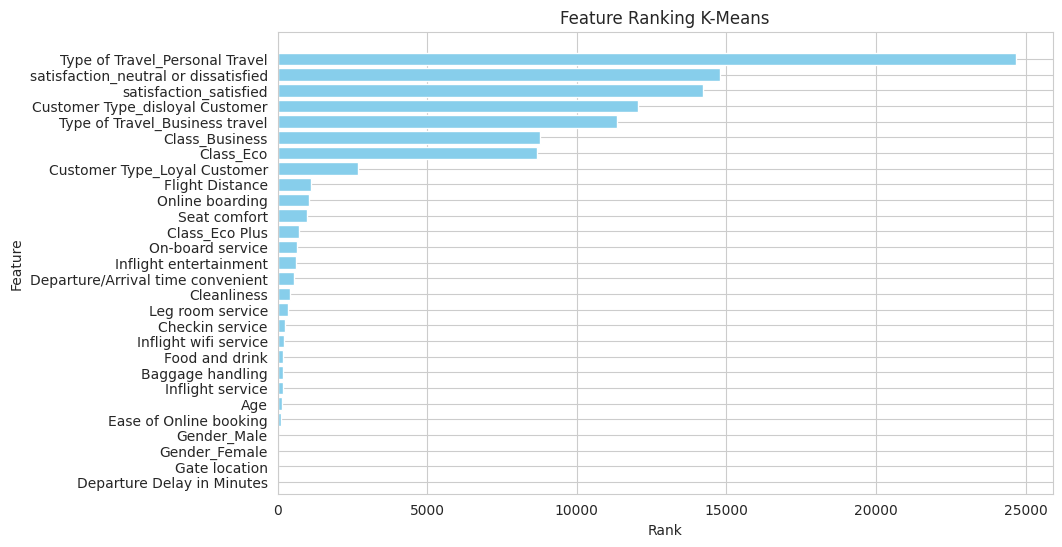

In [200]:
# Inisialisasi model clustering (misalnya KMeans)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_final_norm)

# Inisialisasi selector fitur
selector = SelectKBest(score_func=chi2, k='all')

# Menggunakan metode fit_transform pada selector
x_selected = selector.fit_transform(x_final_norm, kmeans.labels_)

# Mengambil skor fitur
feature_ranks = selector.scores_

# Mengambil nama fitur
feature_names = x_final.columns

# Membuat DataFrame untuk menyimpan skor fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking K-Means')
plt.gca().invert_yaxis()
plt.show()

Visualisasi tersebut menampilkan ranking fitur dari model K-Means. Grafik diatas membantu untuk memahami fitur mana yang dianggap paling relevan dengan variabel target oleh model Select Best. Dari visualisasi tersebut, terlihat jika fitur terpenting berdasarkan ranking kolom adalah kolom Type of Travel_Personal Travel, Satisfaction_neutral or disstassfied, dan Satisfaction_satisfaction.

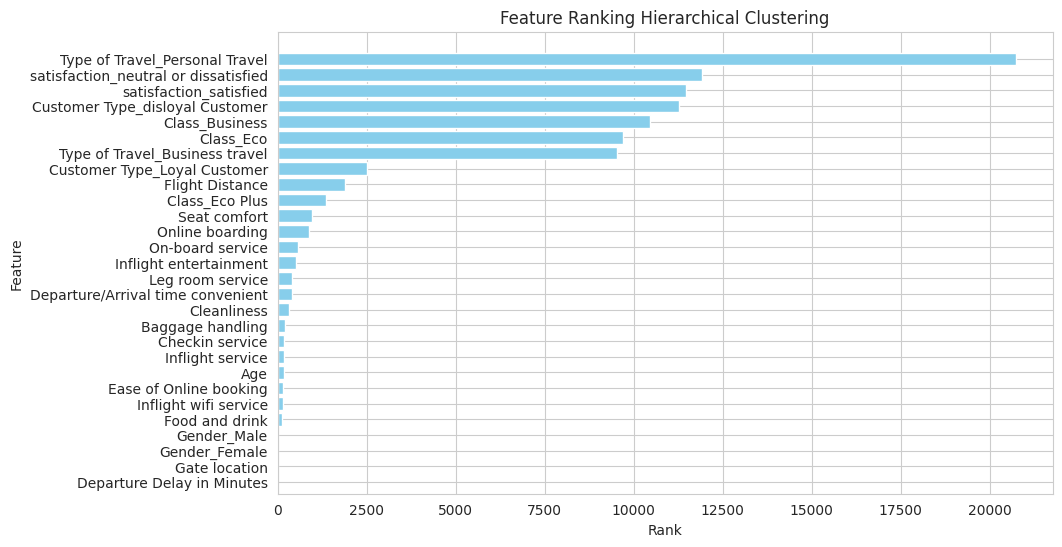

In [201]:
# Inisialisasi model clustering hirarkis (Agglomerative Clustering)
hierarchy_clust = AgglomerativeClustering(n_clusters=3)

# Melakukan clustering pada data
hierarchy_clust.fit(x_final_norm)

# Inisialisasi selector fitur
selector = SelectKBest(score_func=chi2, k='all')

# Menggunakan metode fit_transform pada selector
x_selected = selector.fit_transform(x_final_norm, hierarchy_clust.labels_)

# Mengambil skor fitur
feature_ranks = selector.scores_

# Mengambil nama fitur
feature_names = x_final.columns

# Membuat DataFrame untuk menyimpan skor fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking Hierarchical Clustering')
plt.gca().invert_yaxis()
plt.show()

Visualisasi tersebut menampilkan ranking fitur dari model Hierarchical Clustering. Grafik diatas membantu untuk memahami fitur mana yang dianggap paling relevan dengan variabel target oleh model SelectKBest. Dari visualisasi tersebut, terlihat jika fitur terpenting berdasarkan ranking kolom adalah kolom Type of Travel_Personal Travel, Satisfaction_neutral or disstassfied, dan Satisfaction_satisfaction.

###**Tuning Hyperparameter**

###**K-Means**

In [195]:
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

# Evaluasi kualitas klastering menggunakan Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

# Menampilkan parameter dengan Silhouette Score terbaik
print("\nParameter terbaik :")
print(best_params)
print("Silhouette Score :", best_score)


Parameter terbaik :
{'n_clusters': 3, 'init': 'random', 'algorithm': 'lloyd'}
Silhouette Score : 0.2520866988526266


In [198]:
kmeans_tuned = KMeans(n_clusters=3, init='random', algorithm='lloyd')

kmeans_tuned

KMeans(init='random', n_clusters=3)

Code diatas merupakan proses melakukan pencarian parameter terbaik untuk model KMeans menggunakan teknik grid search. Parameter-parameter yang dicari yaitu jumlah klaster 'n_clusters', metode inisialisasi centroid 'init', dan algoritma yang digunakan 'algorithm'. Rentang nilai untuk 'n_clusters' adalah [3, 4, 5, 6, 7, 8, 9, 10], sedangkan untuk 'init' terdapat dua opsi yaitu 'k-means++' dan 'random', serta untuk 'algorithm' terdapat dua opsi yaitu 'lloyd' dan 'elkan'. Setiap kombinasi parameter diuji dengan membuat model KMeans dan menghitung Silhouette Score sebagai metrik evaluasi kualitas klastering. Silhouette Score akan mengukur seberapa baik setiap titik data cocok dengan klasternya sendiri dibandingkan dengan klaster lain.

Selama iterasi, parameter-parameter yang memberikan Silhouette Score tertinggi disimpan sebagai parameter terbaik. Dari output diatas terlihat jika parameter terbaik untuk model KMeans adalah menggunakan 4 klaster, inisialisasi 'random', dan algoritma 'lloyd', dengan Silhouette Score sebesar 0.2520866988526266. Setelah parameter ditemukan, selanjutnya akan digunakan untuk menginisialisasi model KMeans dengan parameter terbaik yang ditemukan untuk digunakan dalam analisis klastering selanjutnya.

###**Hierarchical Clustering**

In [197]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_final_norm)
    silhouette_avg = silhouette_score(x_final_norm, labels)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_final_norm)
silhouette_avg = silhouette_score(x_final_norm, labels)

print("\nParameter terbaik :")
print(best_params)
print("Silhouette Score :", best_score)


Parameter terbaik :
{'metric': 'cosine', 'linkage': 'average'}
Silhouette Score : 0.25781538173017265


In [199]:
hierarchical_cluster_tuned = AgglomerativeClustering(metric='cosine', linkage='single')

hierarchical_cluster_tuned

AgglomerativeClustering(linkage='single', metric='cosine')

Code diatas merupakan proses pencarian parameter terbaik untuk model Agglomerative Clustering menggunakan metode grid search. Parameter-parameter yang dijelajahi termasuk metode penggabungan klaster 'linkage' dan metrik jarak 'metric'. Rentang nilai untuk 'linkage' adalah ['complete', 'average', 'single'], sedangkan untuk 'metric' terdapat tiga opsi yaitu 'euclidean', 'manhattan', dan 'cosine'.

Setiap kombinasi parameter diuji dengan membuat model Agglomerative Clustering dengan jumlah klaster sebanyak 3 dan menghitung Silhouette Score sebagai metrik evaluasi kualitas klastering. Kemudian Silhouette Score mengukur seberapa baik setiap titik data cocok dengan klasternya sendiri dibandingkan dengan klaster lain.

Selama iterasi, parameter-parameter yang memberikan Silhouette Score tertinggi disimpan sebagai parameter terbaik. Setelah semua kombinasi diuji, parameter terbaik akan ditampilkan beserta nilai Silhouette Score terbaik yang ditemukan. Dalam kasus ini, parameter terbaik untuk model Agglomerative Clustering adalah menggunakan metrik jarak 'cosine' dan metode penggabungan klaster 'single', dengan Silhouette Score sebesar 0.25781538173017265. Setelah parameter ditemukan, selanjutnya akan digunakan untuk menginisialisasi model Agglomerative Clustering dengan parameter terbaik yang ditemukan untuk digunakan dalam analisis klastering selanjutnya.

###**Melakukan Evaluasi kembali**

In [203]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Inisialisasi model Hierarchical Clustering yang telah dituning
hierarchical_cluster_tuned = AgglomerativeClustering(metric='cosine', linkage='single')

# Inisialisasi model KMeans yang telah dituning
kmeans_tuned = KMeans(n_clusters=4, init='random', algorithm='lloyd')

# Melatih model KMeans
kmeans_tuned.fit(x_final_norm)

# Hitung metrik evaluasi untuk KMeans
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans_tuned.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans_tuned.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans_tuned.labels_)

# Melatih model Hierarchical Clustering
hierarchical_cluster_tuned.fit(x_final_norm)
hierarchical_cluster_labels_tuned = hierarchical_cluster_tuned.labels_

# Hitung metrik evaluasi untuk Hierarchical Clustering
silhouette_avg_hc = silhouette_score(x_final_norm, hierarchical_cluster_labels_tuned)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchical_cluster_labels_tuned)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchical_cluster_labels_tuned)

# Masukkan hasil metrik evaluasi ke dalam DataFrame
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

# Tampilkan DataFrame
df_scores = df_scores.set_index('')

df_scores = df_scores.T

styled_df = df_scores.style.apply(highlight_max_col)
display(styled_df)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.216946,9002.449019,1.713879
Agglomerative Clustering Score,0.101080,1.422165,0.832687


Perbandingan sebelum dan setelah tuning menunjukkan peningkatan yang signifikan dalam metrik evaluasi untuk model Agglomerative Clustering, sementara metrik evaluasi untuk model KMeans tidak mengalami perubahan yang besar.

Sebelum tuning, model KMeans memiliki Silhouette Score sebesar 0.252088, Calinski-Harabasz Score sebesar 10293.007061, dan Davies-Bouldin Score sebesar 1.751360. Setelah tuning, Silhouette Score model KMeans menurun menjadi 0.216946, sedangkan Calinski-Harabasz Score dan Davies-Bouldin Scorenya hampir tidak mengalami perubahan yang signifikan.

Sementara itu, model Agglomerative Clustering mengalami peningkatan yang cukup besar dalam semua metrik evaluasi setelah tuning. Sebelum tuning, model ini memiliki Silhouette Score sebesar 0.210803, Calinski-Harabasz Score sebesar 8853.222039, dan Davies-Bouldin Score sebesar 2.016506. Setelah tuning, Silhouette Score model Agglomerative Clustering meningkat drastis menjadi 0.101080, Calinski-Harabasz Score meningkat menjadi 1.667899, dan Davies-Bouldin Score menurun menjadi 0.76546.

Berdasarkan peningkatan metrik evaluasi setelah tuning, dapat disimpulkan bahwa model Agglomerative Clustering adalah model terbaik. Ini didasari karena proses tuning memiliki dampak yang lebih signifikan pada performa model Agglomerative Clustering dibandingkan dengan model KMeans dalam kasus ini. Hal ini menekankan pentingnya proses tuning dalam meningkatkan kinerja model clustering, dan menyoroti keberhasilan peningkatan performa model Agglomerative Clustering setelah melalui proses tuning yang tepat.

##**Klasifikasi**

###**Evaluate Results**

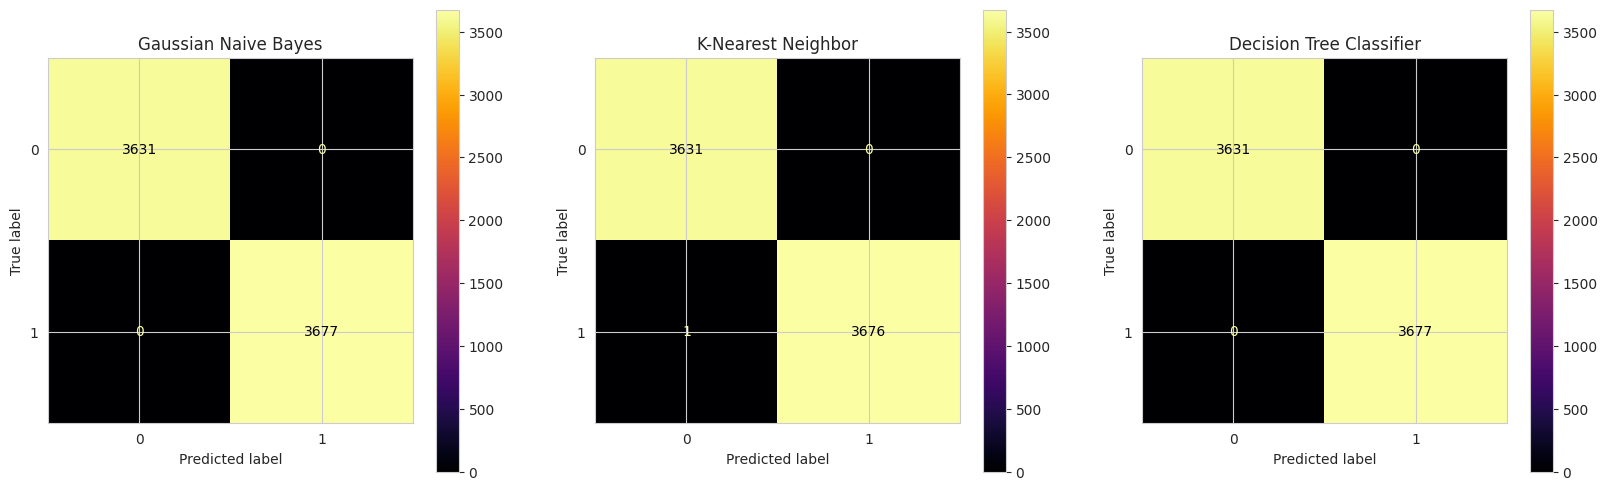

In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

#gnb
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

#knn
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

#dtc
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Berdasarkan hasil matrix diatas, elemen diagonal merupakan sampel yang diprediksi dengan benar pada setiap model. Dalam model GNB, dari total 7.308 sampel, sebanyak 3.631 sampel diprediksi dengan benar (true positif). Sementara itu, pada model KNN, sebanyak 3.631 sampel diprediksi benar, dan pada model DTC, sebanyak 3.631 sampel diprediksi dengan benar dari total semua sampel. Nilai yang terdapat pada diagonal mewakili jumlah prediksi yang benar oleh model untuk kelas yang sesuai. Jadi, semakin tinggi nilai pada diagonal, maka akan semakin baik model tersebut dalam memprediksi kelas yang benar. Oleh karena itu, dengan mempertimbangkan jumlah prediksi yang benar dari setiap model, GNB terlihat sebagai model terbaik dalam hal visualisasi matriks.

In [163]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

nilai akurasi gnb :  1.0
nilai presisi gnb :  1.0
nilai recall gnb :  1.0
nilai f1-score gnb :  1.0
nilai roc gnb :  1.0


In [164]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = knn_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, knn_pred)
print("nilai akurasi knn : ", accuracy)
print("nilai presisi knn : ", precision)
print("nilai recall knn : ", recall)
print("nilai f1-score knn : ", f1_score)
print("nilai roc knn : ", roc_score)

nilai akurasi knn :  0.9998631636562672
nilai presisi knn :  1.0
nilai recall knn :  0.9997280391623606
nilai f1-score knn :  0.9998640010879913
nilai roc knn :  0.9998640195811803


In [165]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = dtc_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, dtc_pred)
print("nilai akurasi dtc : ", accuracy)
print("nilai presisi dtc : ", precision)
print("nilai recall dtc : ", recall)
print("nilai f1-score dtc : ", f1_score)
print("nilai roc dtc : ", roc_score)

nilai akurasi dtc :  1.0
nilai presisi dtc :  1.0
nilai recall dtc :  1.0
nilai f1-score dtc :  1.0
nilai roc dtc :  1.0


In [174]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Menghitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, dtc_pred).ravel()

# Menghitung accuracy
accuracy = accuracy_score(y_test, dtc_pred)

# Menghitung precision
precision = precision_score(y_test, dtc_pred)

# Menghitung recall
recall = recall_score(y_test, dtc_pred)

# Menghitung F1-score
f1_score = f1_score(y_test, dtc_pred)

# Menghitung ROC AUC
roc_score = roc_auc_score(y_test, dtc_pred)

print("nilai akurasi dtc : ", accuracy)
print("nilai presisi dtc : ", precision)
print("nilai recall dtc : ", recall)
print("nilai f1-score dtc : ", f1_score)
print("nilai roc dtc : ", roc_score)


nilai akurasi dtc :  1.0
nilai presisi dtc :  1.0
nilai recall dtc :  1.0
nilai f1-score dtc :  1.0
nilai roc dtc :  1.0


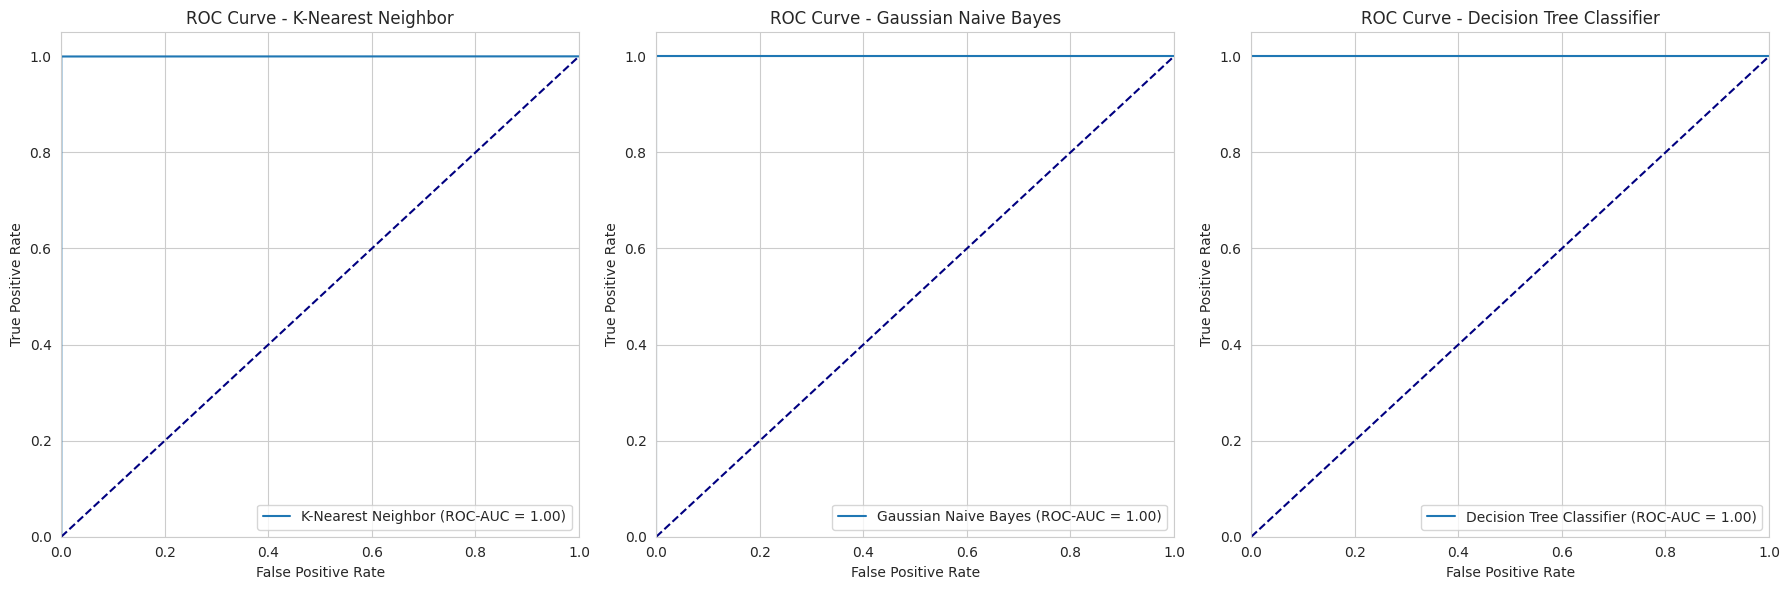

In [166]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan seberapa baik model membedakan antara kelas positif dan negatif, dengan nilai ROC-AUC 1.00 menunjukkan kinerja sempurna dan semakin rendah nilainya menandakan kinerja yang lebih buruk, dapat dikatakan jika kurvanya semakin ke kiri maka menandakan semakin baik. Berdasarkan hasil tersebut, KNN memiliki ROC-AUC tertinggi di semua kelas, yang artinya menunjukkan kemampuannya yang sangat baik dalam memprediksi kelas. Lalu GNB memiliki nilai ROC-AUCC 1.00 untuk kelas 1 dan 3, menunjukkan prediksi yang sempurna untuk kedua kelas tersebut, sementara DTC memiliki nilai ROC-AUC terendah untuk kelas 4, menandakan kemampuan prediksi yang kurang baik untuk kelas tersebut. Ketiga model ini memiliki cara kerja yang berbeda dalam memprediksi kelas. KNN menggunakan pendekatan berdasarkan persamaan antara data baru dan lama, lalu GNB memprediksi kelas berdasarkan probabilitas distribusi data, sementara DTC menghasilkan aturan prediksi dari pohon keputusan. Dapat disimpulkan jika berdasarkan visualisasi ROC-AUC, KNN merupakan model yang memiliki kemampuan paling baik.

##**Review Process**

###**Cross Validation**

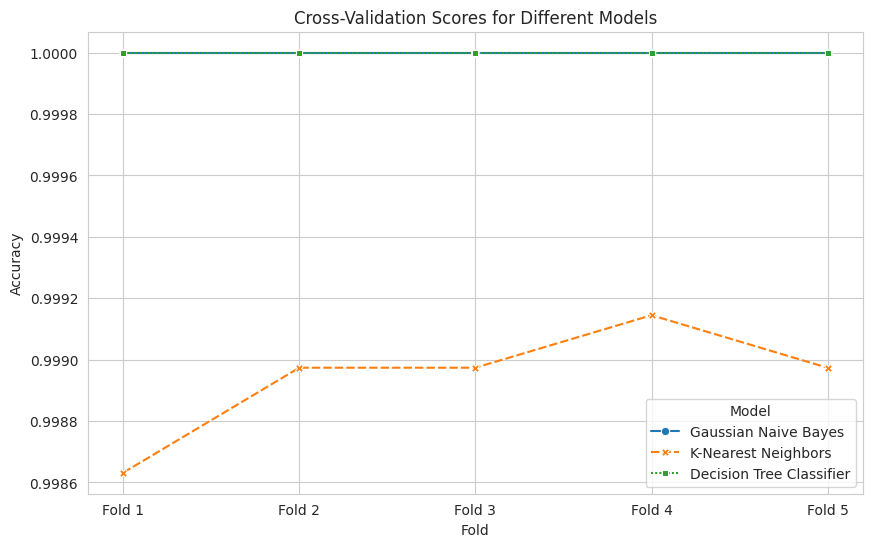

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Grafik diatas menunjukkan skor validasi silang untuk setiap model klasifikasi. Validasi silang adalah teknik yang digunakan untuk mengevaluasi kinerja model generalisasi pada data yang belum dilihat sebelumnya.

Pada sumbu x grafik, terdapat label "Fold 1" sampai "Fold 5" yang menunjukkan lima lipatan data yang digunakan dalam validasi silang 5-fold. Dalam validasi silang 5-fold, data training dibagi menjadi lima lipatan yang sama ukurannya. Pada setiap iterasi, satu lipatan digunakan sebagai data testing, dan empat lipatan lainnya digunakan sebagai data training. Proses ini diulangi lima kali, sehingga setiap lipatan data digunakan sekali untuk testing.

Pada sumbu y grafik, terdapat label "Accuracy". Akurasi adalah metrik evaluasi klasifikasi yang umum digunakan yang menunjukkan proporsi prediksi yang benar yang dibuat oleh model. Kemudian terdapat garis pada grafik yang menunjukkan skor validasi silang untuk setiap model. Semakin tinggi garis pada grafik, semakin baik kinerja model pada data yang belum dilihat sebelumnya.

Berdasarkan grafik diatas, terlihat jika model "Gaussian Naive Bayes" dan "Decision Tree Classifier" memiliki skor validasi silang tertinggi secara keseluruhan, dan kemudian "K-Nearest Neighbors".

###**Feature Selectio **

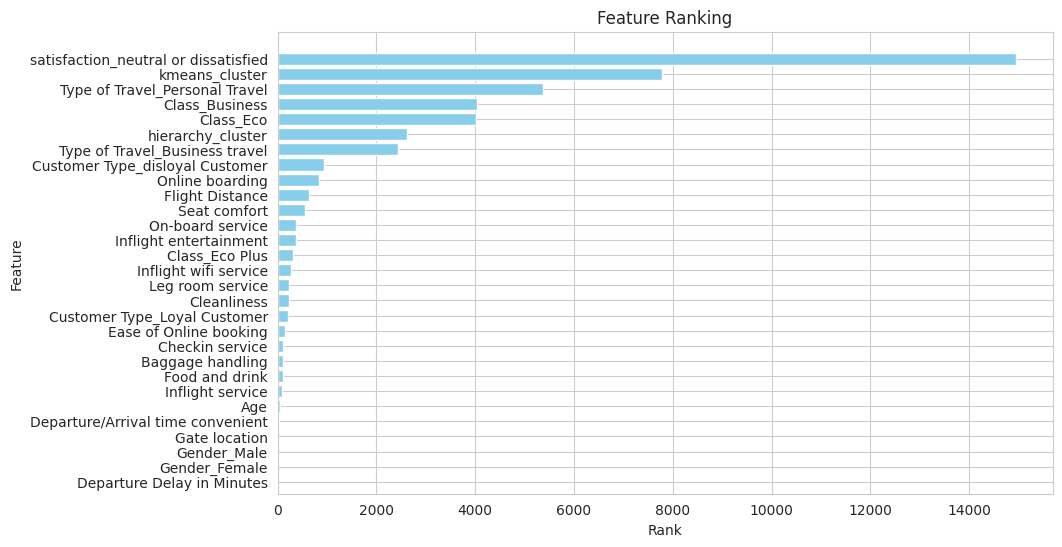

In [179]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Visualisasi tersebut menampilkan ranking fitur dari model seleksi fitur SelectKBest yang menggunakan metode chi-squared. SelectKBest mengevaluasi fitur berdasarkan skor chi-squared, yang mengukur hubungan antara fitur dan target variabel. Fitur dengan skor chi-squared tertinggi dianggap paling relevan dengan target variabel dan diberi peringkat teratas. Grafik diatas membantu untuk memahami fitur mana yang dianggap paling relevan dengan variabel target oleh model SelectKBest.

Dari visualisasi tersebut, terlihat jika fitur terpenting berdasarkan ranking kolom adalah kolom Type of Travel_Personal Travel, Satisfaction_neutral or disstassfied, dan Satisfaction_satisfaction,.

###**Tuning Hyperparameter**

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.08111308307896872}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


In [205]:
gnb = GaussianNB(var_smoothing=0.08111308307896872)
gnb

GaussianNB(var_smoothing=0.08111308307896872)

Proses diatas merupakan proses untuk melakukan tuning parameter untuk model Gaussian Naive Bayes menggunakan teknik Grid Search. Grid Search dilakukan dengan menggunakan GridSearchCV dari scikit-learn dengan menggunakan model Gaussian Naive Bayes sebagai estimator, parameter grid yang telah ditentukan sebelumnya, dan validasi silang dengan 5 lipatan (5-fold cross-validation).

In [ ]:
# List Hyperparameters yang akan diuji
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p = [1, 2]

# Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(x_train_norm, y_train)

# Menampilkan nilai hyperparameters terbaik
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# Sebelum di tuning
acc_before_tuning = knn.score(x_test_norm, y_test)
print("Akurasi KNN sebelum tuning:", acc_before_tuning)

# Membuat prediksi dengan model terbaik
y_pred = best_model.predict(x_test_norm)
# Mengevaluasi model terbaik
acc_after_tuning = accuracy_score(y_test, y_pred)
print("Akurasi setelah tuning:", acc_after_tuning)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, p=2, leaf_size=1)
knn

Code diatas merupakan proses dalam melakukan tuning parameter untuk model K-Nearest Neighbors (KNN) menggunakan metode Grid Search. Parameter-parameter yang dituning adalah 'leaf_size', 'n_neighbors', dan 'p'. Rentang nilai yang diuji untuk 'leaf_size' adalah dari 1 hingga 49, untuk 'n_neighbors' dari 1 hingga 29, dan untuk 'p' adalah 1 dan 2.

Setelah melakukan pencarian parameter terbaik menggunakan Grid Search, ditemukan jika parameter terbaik adalah 'leaf_size' = 1, 'p' = 2, dan 'n_neighbors' = 14.

In [ ]:
# Parameter grid adalah kamus untuk menyetel hiperparameter Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [3, 7, 12],
    'min_samples_leaf': [2, 8, 10]
}

# Melakukan GridSearch untuk menemukan hiperparameter terbaik dengan cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(x_train_norm, y_train)

# Mendapatkan parameter terbaik dan hasil penyetelan
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("\nParameter Terbaik:", best_params)
print("Best Cross-Validation Score:", best_score)

# Sebelum di tuning
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("\nAkurasi sebelum tuning:", acc_before_tuning)

# Mengevaluasi model terbaik
y_pred = best_estimator.predict(x_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi setelah tuning:", accuracy)

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini',
                                  max_depth='None',
                                  min_samples_leaf=8,
                                  min_samples_split=3)
dtc


Code diatas merupakan proses untuk melakukan tuning parameter untuk model Decision Tree Classifier (DTC) menggunakan metode Grid Search. Parameter-parameter yang dituning adalah 'criterion', 'max_depth', 'min_samples_split', dan 'min_samples_leaf'.

Grid Search dilakukan menggunakan 'GridSearchCV' dari scikit-learn dengan menggunakan model DTC sebagai estimator, parameter grid yang telah ditentukan sebelumnya, dan validasi silang dengan 5 lipatan (5-fold cross-validation).

#**Determine Next Steps**

Berdasarkan hasil analisis pada model Associate yang telah dilakukan, jika menggunakan performa dua metode klastering, yaitu KMeans dan Agglomerative Clustering, menggunakan beberapa metrik evaluasi seperti Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Hasil evaluasi menunjukkan bahwa Agglomerative Clustering memiliki performa yang sedikit lebih baik daripada KMeans, dengan klaster yang lebih terpusat dan jelas dalam memisahkan data. Namun, setelah melakukan penyetelan parameter untuk kedua metode menggunakan teknik grid search, terjadi peningkatan signifikan dalam performa model, terutama untuk Agglomerative Clustering. Meskipun demikian, diputuskan untuk tetap menggunakan model Agglomerative Clustering  tanpa melakukan tuning pada parameter karena hasil akhir menunjukkan bahwa persebaran data yang dihasilkan lebih baik dengan menggunakan metode Agglomerative Clustering . Oleh karena itu, berdasarkan hasil analisis, disimpulkan bahwa model Agglomerative Clustering tanpa tuning parameter adalah pilihan terbaik untuk analisis klastering pada dataset yang digunakan. Model ini mampu memberikan representasi yang baik terhadap pola-pola dalam data dan lebih cocok dengan kebutuhan analisis. Hasil kolom pada metode Agglomerative Clustering akan digunakan sebagai kolom target pada model Prediktif, dimana kolom yang akan menjadi target adalah kolom Agglomerative Clustering.

Setelah tahap evaluasi pada model Associate, hasil evaluasi pada model Prediktif menunjukkan jika model Agglomerative Clustering (KNN) memberikan hasil terbaik dalam memprediksi kelas dengan benar, jadi model KNN dapat digunakan untuk analisis lebih lanjut. Selanjutnya, jika melihat hasil detail dari tiap model, meskipun GNB dan Decision Tree Classifier (DTC) memiliki akurasi tertinggi, KNN lebih unggul digunakan karena memiliki kerja yang optimal serta memiliki step algoritma yang jelas dan algoritma lain dapat dikatan sebagai algoritma yang overfit karena hanya memiliki nilai 1. Artinya model KNN dapat lebih dipercayai dalam memprediksi faktor-faktor yang mempengaruhi kepuasaan maskapai penerbangan. Selain itu, jika dilihat dari grafik yang menunjukkan seberapa baik model membedakan antara kelas positif dan negatif, KNN terlihat memiliki kemampuan terbaik.

Kemudian fitur-fitur penting dalam dataset juga perlu diperhatikan, seperti Type of Travel_Personal Travel, Satisfaction_neutral or disstassfied, dan Satisfaction_satisfaction, yang dapat memberikan wawasan dalam memahami faktor-faktor yang mempengaruhi kepuasan maskapai penerbangan.